# Housing Price Prediction Project


Problem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:
- Which variables are important to predict the price of variable?
- How do these variables describe the price of the house?

Business Goal:

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

Technical Requirements:
    
• Data contains 1460 entries each having 81 variables.

• Data contains Null values. You need to treat them using the domain knowledge and your own understanding.

• Extensive EDA has to be performed to gain relationships of important variable and price.

• Data contains numerical as well as categorical variable. You need to handle them accordingly.

• You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters.

• You need to find important features which affect the price positively or negatively.

• Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on test.csv file.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_excel(r'C:\python\Housing.train.xlsx')

In [3]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

Here we can see the training dataset which has the target variable "SalePrice" and the remaining columns that helps in predicting the sales. Since sales is a continous variable making this to be a Regression problem.

# EDA

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm   
1         Lvl    AllPub    Inside       Mod        NAmes       Norm   
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm   
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm   TwnhsE     1Story            6            5       1976   
1       Norm     1Fam     1Story            8            6       1970   
2       Norm     1Fam     2Story            7            5       1996   
3       Norm     1Fam     1Story            6            6       1977   
4       Norm     1Fam     1Story            6            7       1977   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1976     Gable  CompShg     Plywood     Plywood       None   
1          1970      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None   
2          1997     Gable  CompShg     MetalSd     MetalSd       None   
3          1977       Hip  CompShg     Plywood     Plywood    BrkFace   
4          2000     Gable  CompShg     CemntBd     CmentBd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       Gd       TA           No   
1         0.0        Gd        Gd      PConc       TA       Gd           Gd   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3       480.0        TA        TA     CBlock       Gd       TA           No   
4       126.0        Gd        TA     CBlock       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          ALQ         120          Unf           0        958         1078   
1          ALQ         351          Rec         823       1043         2217   
2          GLQ         862          Unf           0        255         1117   
3          BLQ         705          Unf           0       1139         1844   
4          ALQ        1246          Unf           0        356         1602   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       958         0             0   
1    GasA        Ex          Y      SBrkr      2217         0             0   
2    GasA        Ex          Y      SBrkr      1127       886             0   
3    GasA        Ex          Y      SBrkr      1844         0             0   
4    GasA        Gd          Y      SBrkr      1602         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        958             0             0         2         0             2   
1       2217             1             0         2         0             4   
2       2013             1             0         2         1             3   
3       1844             0             0         2         0             3   
4       1602             0             1         2         0             3   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           1          TA   
1             1          Gd             8        Typ           1          TA   
2             1          TA             8        Typ           1          TA   
3             1          TA       

In [6]:
df.shape

(1168, 81)

In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

# Check for Null Values

In [8]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [9]:
print("Missing values in percentage:")
for i in df:
    percentage = np.round((df[i].isnull().sum()/df.shape[0])*100, 3)
    print(i, ":".format(), percentage, '%')

Missing values in percentage:
Id : 0.0 %
MSSubClass : 0.0 %
MSZoning : 0.0 %
LotFrontage : 18.322 %
LotArea : 0.0 %
Street : 0.0 %
Alley : 93.408 %
LotShape : 0.0 %
LandContour : 0.0 %
Utilities : 0.0 %
LotConfig : 0.0 %
LandSlope : 0.0 %
Neighborhood : 0.0 %
Condition1 : 0.0 %
Condition2 : 0.0 %
BldgType : 0.0 %
HouseStyle : 0.0 %
OverallQual : 0.0 %
OverallCond : 0.0 %
YearBuilt : 0.0 %
YearRemodAdd : 0.0 %
RoofStyle : 0.0 %
RoofMatl : 0.0 %
Exterior1st : 0.0 %
Exterior2nd : 0.0 %
MasVnrType : 0.599 %
MasVnrArea : 0.599 %
ExterQual : 0.0 %
ExterCond : 0.0 %
Foundation : 0.0 %
BsmtQual : 2.568 %
BsmtCond : 2.568 %
BsmtExposure : 2.654 %
BsmtFinType1 : 2.568 %
BsmtFinSF1 : 0.0 %
BsmtFinType2 : 2.654 %
BsmtFinSF2 : 0.0 %
BsmtUnfSF : 0.0 %
TotalBsmtSF : 0.0 %
Heating : 0.0 %
HeatingQC : 0.0 %
CentralAir : 0.0 %
Electrical : 0.0 %
1stFlrSF : 0.0 %
2ndFlrSF : 0.0 %
LowQualFinSF : 0.0 %
GrLivArea : 0.0 %
BsmtFullBath : 0.0 %
BsmtHalfBath : 0.0 %
FullBath : 0.0 %
HalfBath : 0.0 %
BedroomAbvG

Now we are about to drop columns that have most of their values as "null". 
The columns that are about to get dropped is:
Alley : 93.408 % 

FireplaceQu : 47.175 % 

PoolQC : 99.401 % 

Fence : 79.709 % 

MiscFeature : 96.233 %

In [10]:
df.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis=1, inplace=True)

The columns with most data as null values are dropped, because treating them wouldn't be realistic.

In [11]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1168 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearBuil

This shows that the dataset has mixed type of data types like int, float, object.

In [13]:
# To find unique values
df.nunique()

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
Street              2
LotShape            4
LandContour         4
Utilities           1
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         110
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        14
Exterior2nd        15
MasVnrType          4
MasVnrArea        283
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        551
BsmtFinType2        6
BsmtFinSF2        122
BsmtUnfSF         681
TotalBsmtSF       636
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          669
2ndFlrSF          351
LowQualFinSF       21
GrLivArea 

The column id has all the rows as different values and column 'utilities' has only one value throughout, so dropping both the columns.

In [14]:
df.drop(["Id", "Utilities"], axis=1, inplace=True)

In [15]:
#categorical columns
cat_columns= [x for x in df.dtypes.index if df.dtypes[x]=='object']
cat_columns

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [16]:
# To find vlues of categorical column
for i in cat_columns:
    print(i)
    print(df[i].value_counts())
    print("*" *100)

MSZoning
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64
****************************************************************************************************
Street
Pave    1164
Grvl       4
Name: Street, dtype: int64
****************************************************************************************************
LotShape
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64
****************************************************************************************************
LandContour
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64
****************************************************************************************************
LotConfig
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64
****************************************************************************************************
LandSlope
Gtl    1105
Mod      51

We shall handle the null values of the other columns depending on its datatype and values in it.

In [17]:
#Numerical columns
num_columns= [x for x in df.dtypes.index if df.dtypes[x]=='int64' or df.dtypes[x]=='float64']
num_columns

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [18]:
df['LotFrontage']= df['LotFrontage'].fillna(df['LotFrontage'].mode()[0])

In [19]:
df['MasVnrType']= df['MasVnrType'].fillna('BrkCmn')
df['MasVnrArea']= df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

In [20]:
df['BsmtQual']= df['BsmtQual'].fillna('Fa')
df['BsmtCond']= df['BsmtCond'].fillna('Po')
df['BsmtExposure']= df['BsmtExposure'].fillna('Mn')
df['BsmtFinType1']= df['BsmtFinType1'].fillna('LwQ')
df['BsmtFinType2']= df['BsmtFinType2'].fillna('GLQ')

In [21]:
df['GarageType']= df['GarageType'].fillna('2Types')
df['GarageYrBlt']= df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])
df['GarageFinish']= df['GarageFinish'].fillna('Fin')
df['GarageQual']= df['GarageQual'].fillna('Ex')
df['GarageCond']= df['GarageCond'].fillna('Ex')

The columns 'YearBuilt', 'YearRemoAdd', 'GarageYrBlt', 'MoSold', 'YrSold' are of int type but they are all year columns so they have to be converted to object type to be handled properly.

In [22]:
df['MSSubClass']=df['MSSubClass'].astype('object')
df['OverallQual']=df['OverallQual'].astype('object')
df['OverallCond']=df['OverallCond'].astype('object')
df['MoSold']=df['MoSold'].astype('object')
df['YrSold']=df['YrSold'].astype('object')

In [23]:
#categorical columns
cat_columns= [x for x in df.dtypes.index if df.dtypes[x]=='object']
cat_columns

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [24]:
#Numerical columns
num_columns= [x for x in df.dtypes.index if df.dtypes[x]=='int64' or df.dtypes[x]=='float64']
num_columns

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice']

In [25]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

<AxesSubplot:>

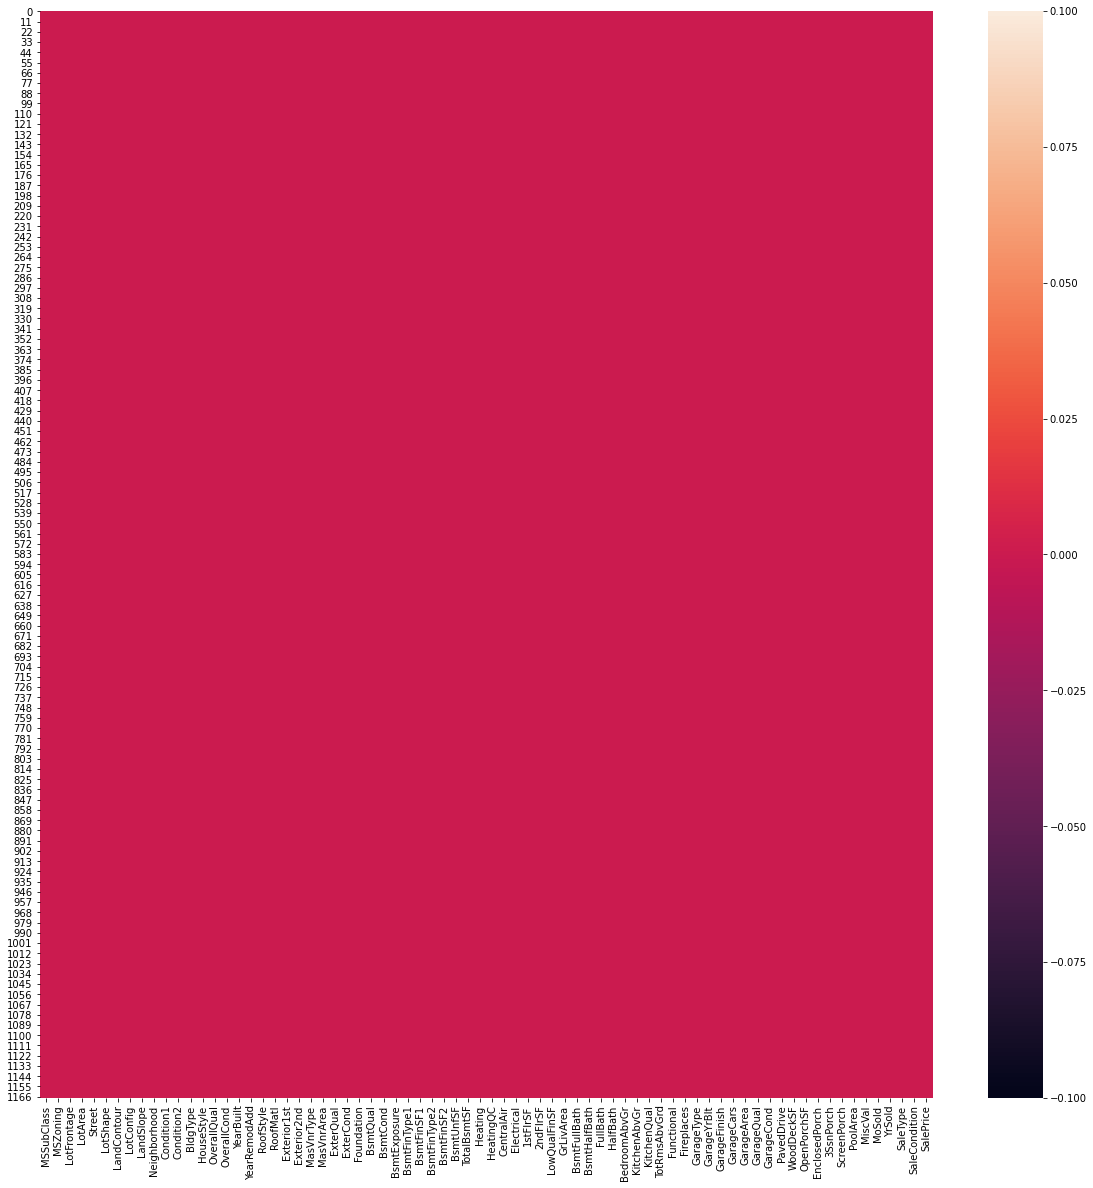

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull())

Now the columns with null values are handled properly, so that there are no null values.

# Visualization

Univariate analysis - Categorical columns

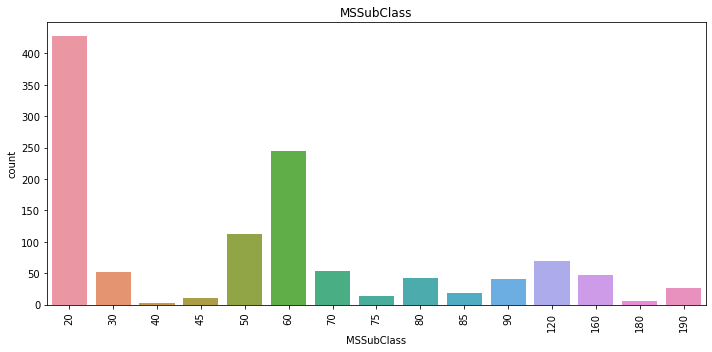

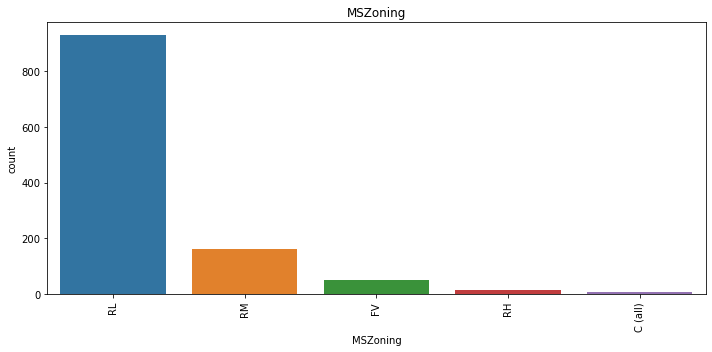

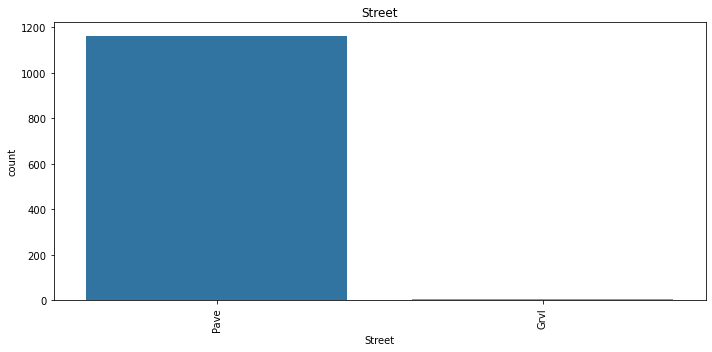

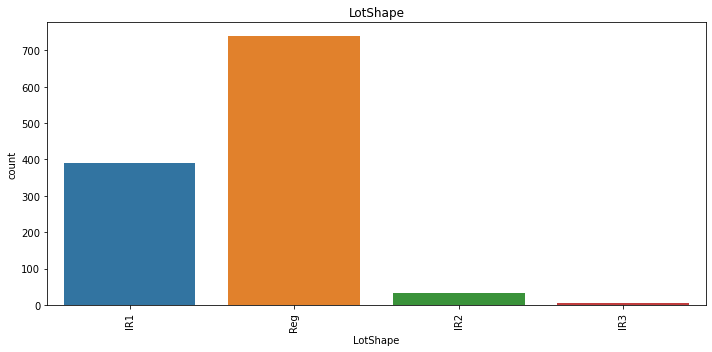

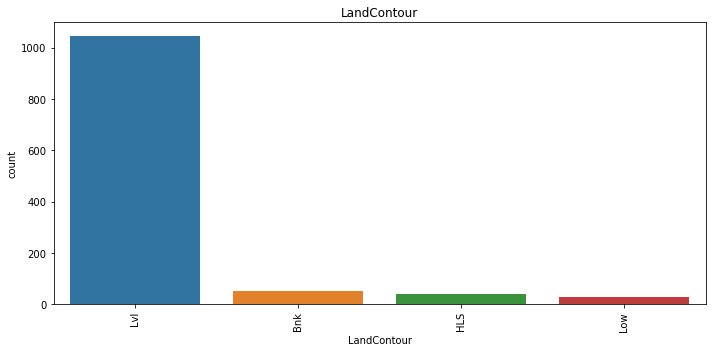

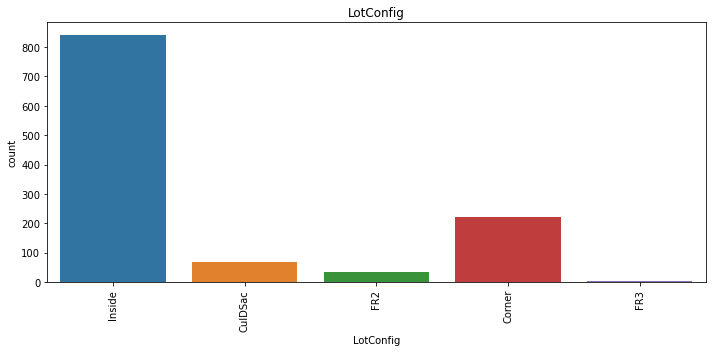

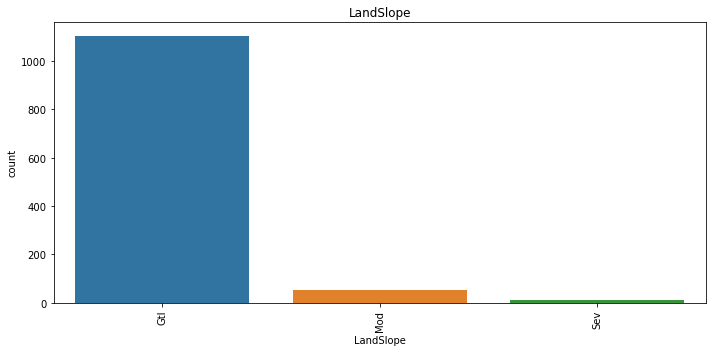

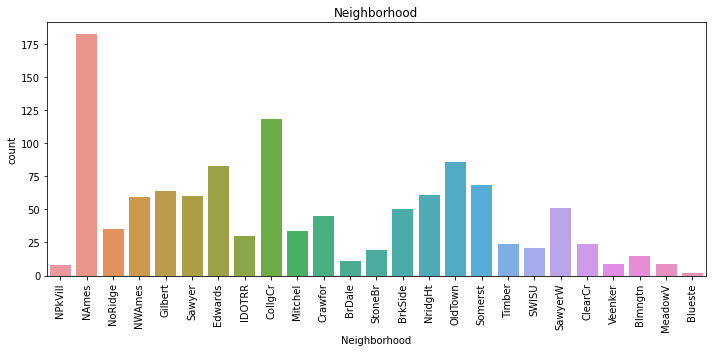

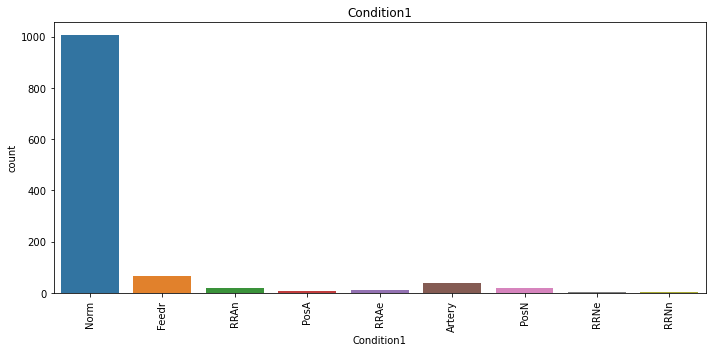

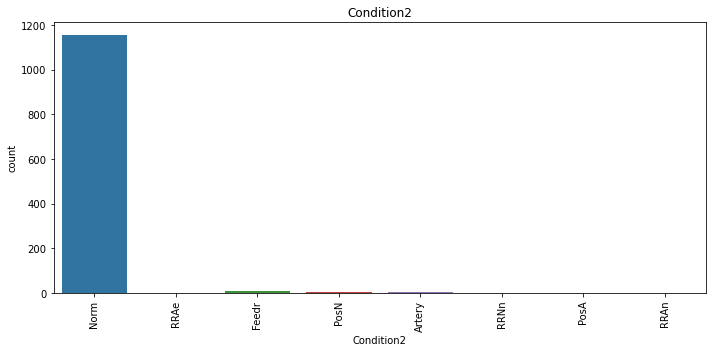

In [26]:
for i in cat_columns[0:10]:
    plt.figure(figsize=(10,5))
    sns.countplot(df[i])
    plt.title(i)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

Observations:
    *With MsSubClass 1storey and 2 storey newer dwelling seems to be more than other types.
    *With MsZoning column we see that most houses are in residentialLowDensity zone.
    *In Street, paved type of road access to property seems to be higher than gravel.
    *With Lotshape, regular shape of property is seen more
    *With LandContour, most houses seems to be in flat level of land.
    *In LotConfig column, inside lot area is found the most
    *In LandSlope, gentle slopes seems to be more for the houses.
    * With neighbourhood, the physical locations are evenly distributed.

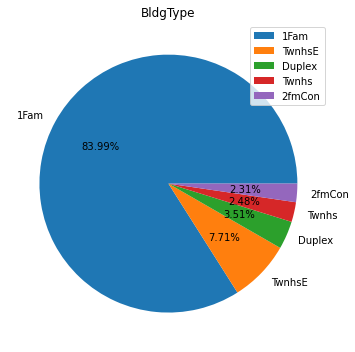

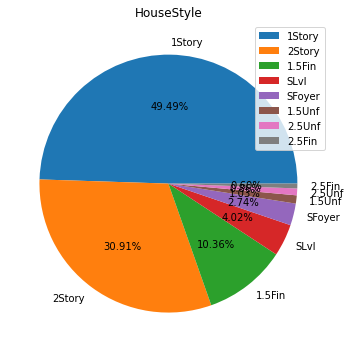

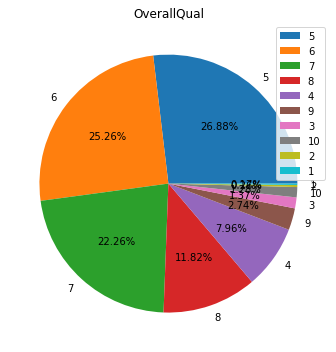

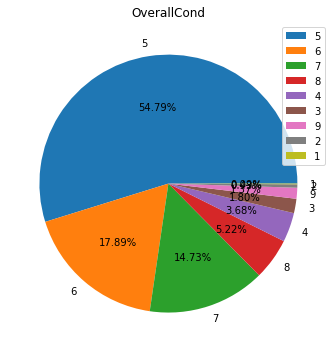

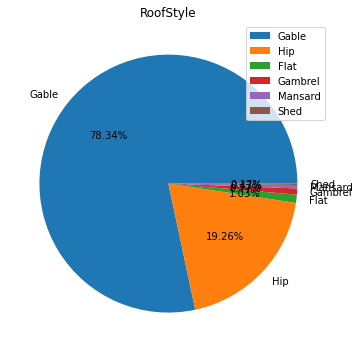

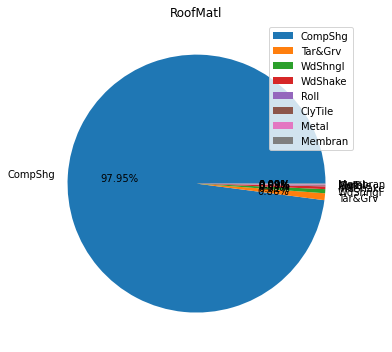

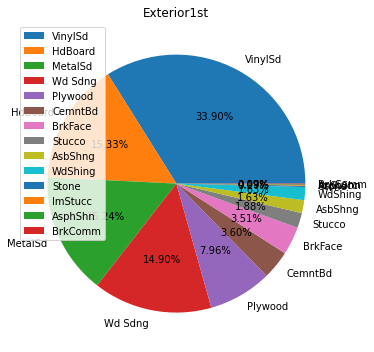

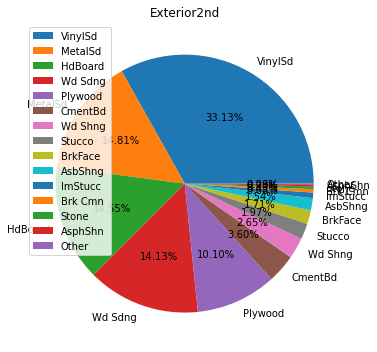

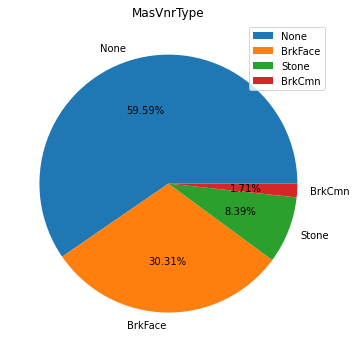

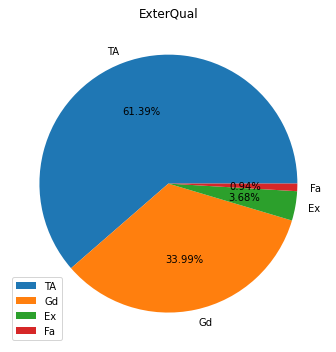

In [27]:
for i in cat_columns[10:20]:
    plt.figure(figsize=(10,5))
    plt.pie(df[i].value_counts(), labels=df[i].value_counts().index, autopct='%1.2f%%')
    plt.legend(prop={'size':10})
    plt.title(i)
    plt.tight_layout()
    plt.show()

* 1Fam dwellins are found more with BldgType feature.
*  Most of the records are for 1Story and 2Story for column HouseStyle
* Most houses are with quality 5,6,7 with OverallQual
* With OverallCond the most records are found to be with 5,6,7
* Gable roofs are highly used here with roofmaterial as conpShg
* Highly prefered Exterior is vinlySd, Hdboard
* Most of the records are for TA & Gd are for ExterQual.

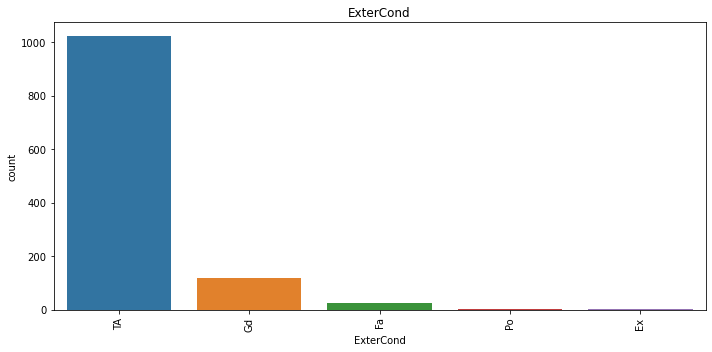

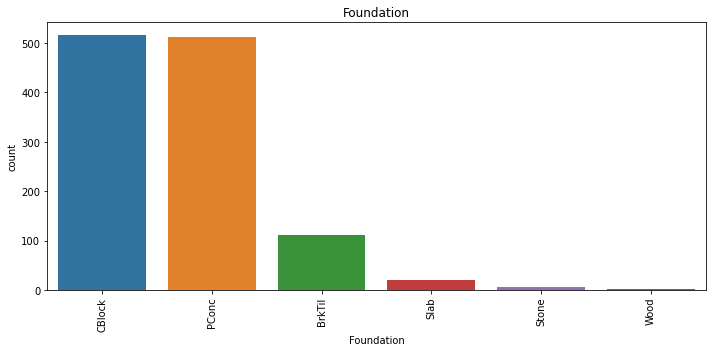

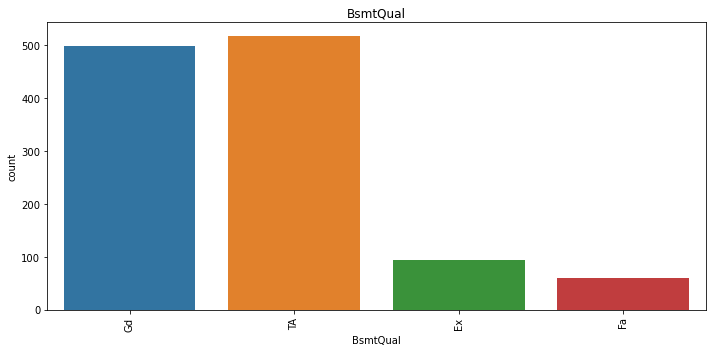

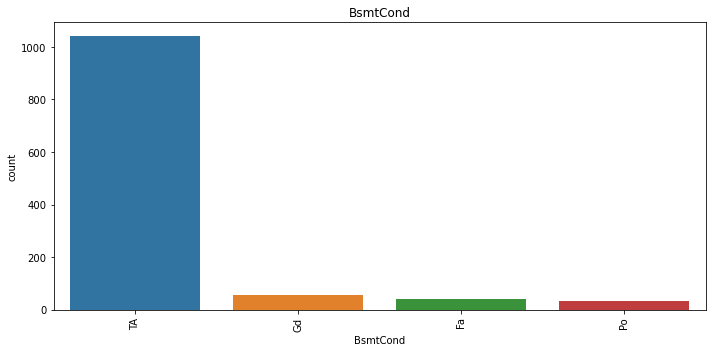

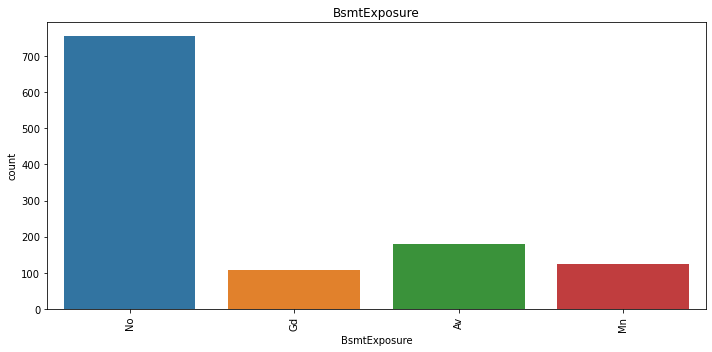

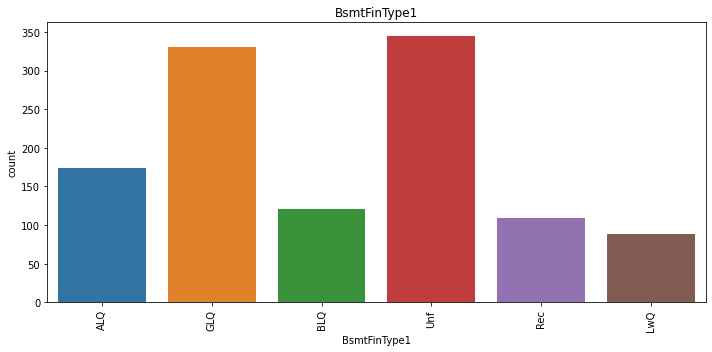

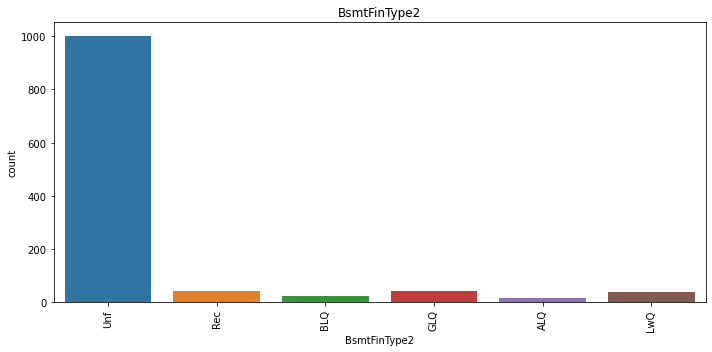

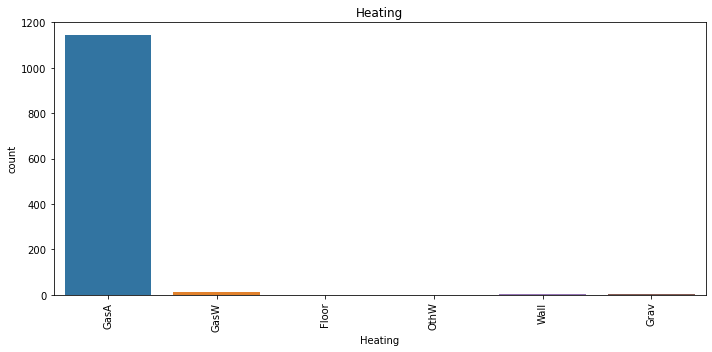

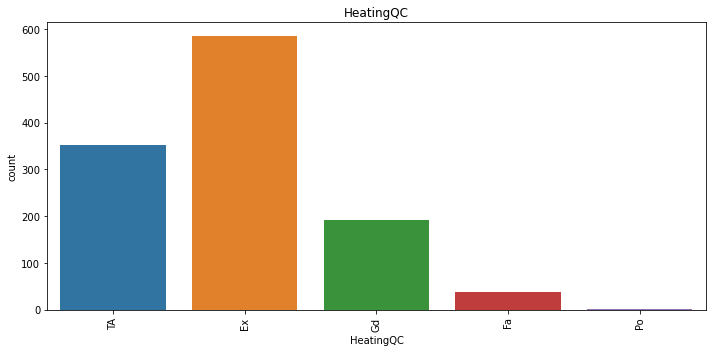

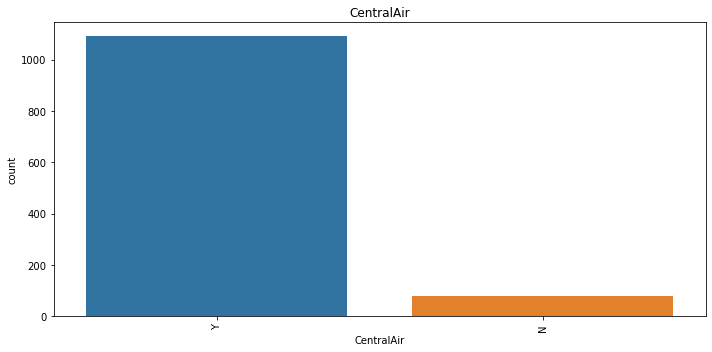

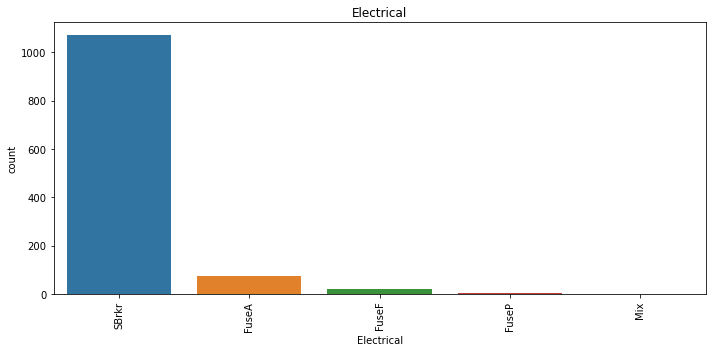

In [28]:
for i in cat_columns[20:31]:
    plt.figure(figsize=(10,5))
    sns.countplot(df[i])
    plt.title(i)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

for feature ExterCond: • Most of the records are for TA. for feature Foundation: • Most of the records are for CBlock and PConc for feature BsmtQual: • Most of the records are for TA & Gd. for feature BsmtCond: • Most of the records are for TA. for feature BsmtExposure: • Most of the records are for No. for feature BsmtFinType1: • Most of the records are for Unf, GLQ and ALQ. for feature BsmtFinType2: • Most of the records are for Unf. for feature Heating: • Most of the records are for GasA. for feature HeatingQC: • Most of the records are for Ex, TA and Gd. for feature CentralAir: • Most of the records are for Y. for feature Electrical: • Most of the records are for SBrkr.

* Most of the records are for TA for column ExterCond
* With Foundation, Cblock and Pconc foundation are most used.
* With BsmtQual, BsmtCond, BsmtExposure Ta and GD re most commonly used.
* Most of the records are for Unf for columns BsmtFinType1, BsmtFinType2
* with Heating GasA is highly used and heatingQC Ex is most used.
* Most houses have Central AirConditioning.

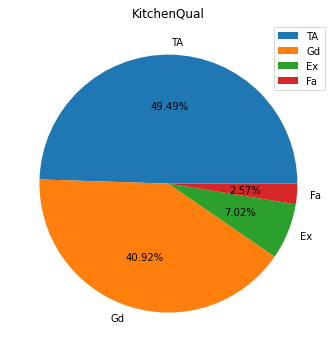

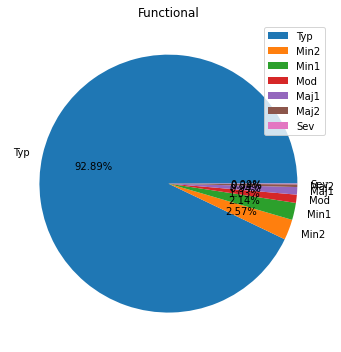

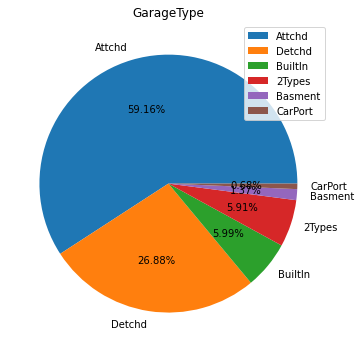

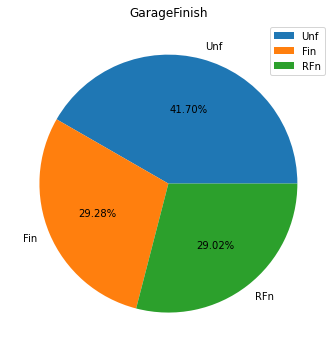

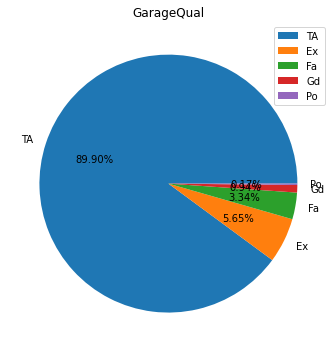

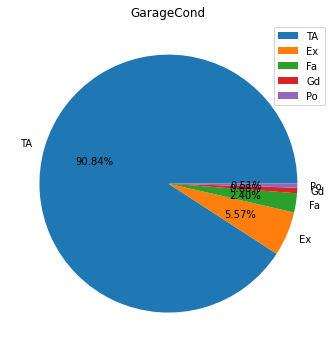

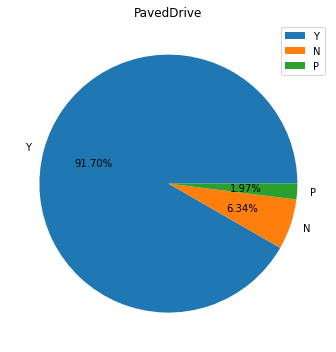

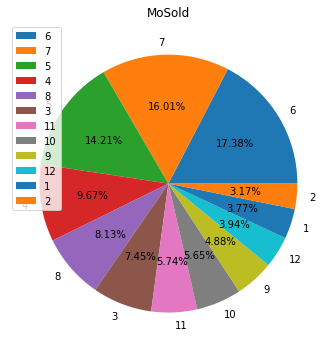

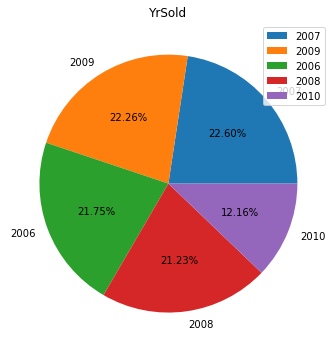

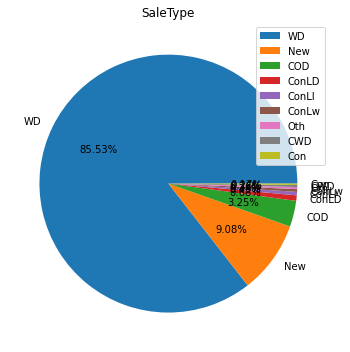

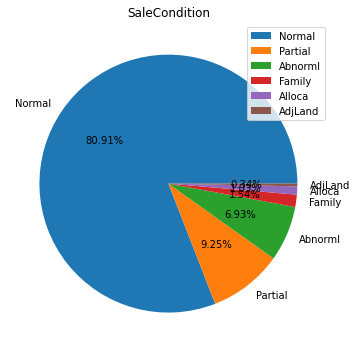

In [29]:
for i in cat_columns[31:]:
    plt.figure(figsize=(10,5))
    plt.pie(df[i].value_counts(), labels=df[i].value_counts().index, autopct='%1.2f%%')
    plt.legend(prop={'size':10})
    plt.title(i)
    plt.tight_layout()
    plt.show()

* For KitchenQual, Most of the records are for TA & Gd.
* Mostly Typical or average Kitchen quality is used
* For GarageType Mostly used are for Attchd and Detchd.
* With GarageFinish, Unfinished garage are highly seen.
* With GarageQual and GarageCond average quality is maintained.
* Most houses have high pavedway.
* With SaleType, Most of the sales are of WarantyDeed.
* For saleCondition Most of the records are for Normal.

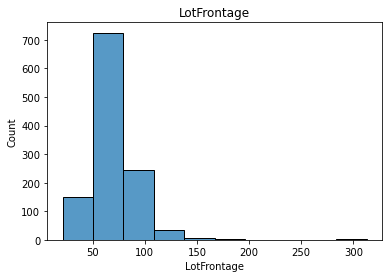

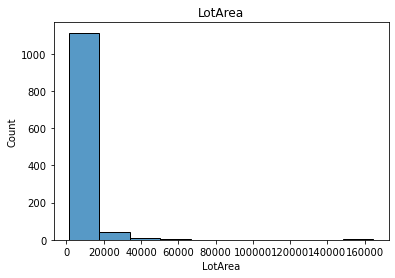

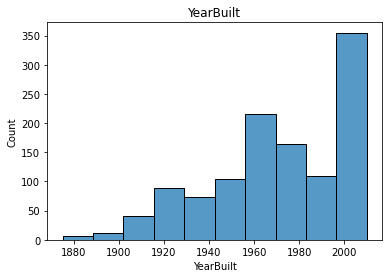

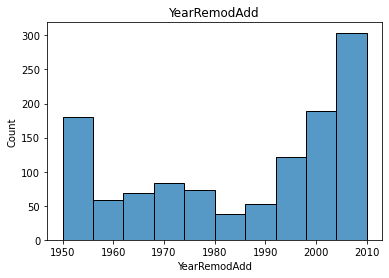

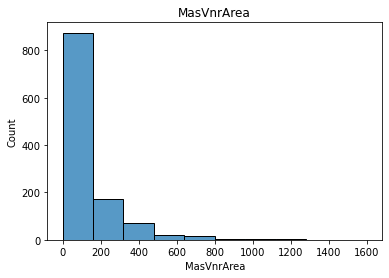

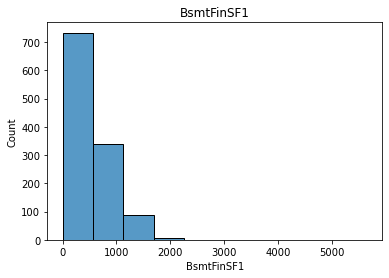

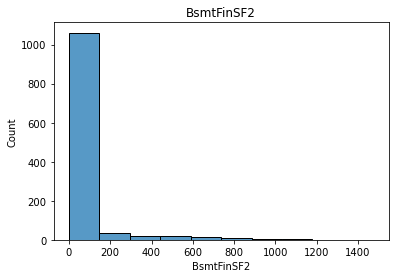

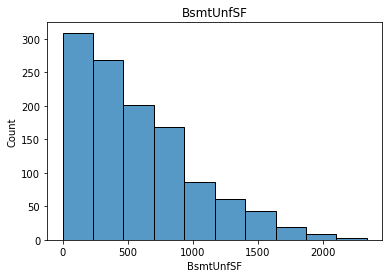

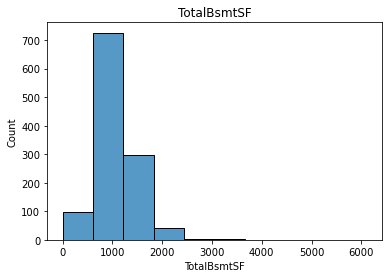

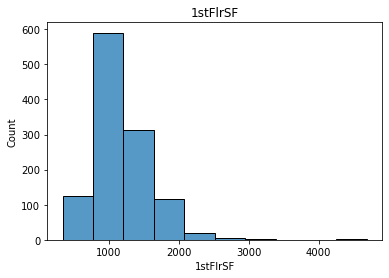

In [30]:
for i in num_columns[0:10]:
    sns.histplot(df[i], bins=10)
    plt.title(i)
    plt.show()

* For LotFrontage the data ranges from 20 to 320 with mean value of 71.
* With LotArea the data ranges from 1000 to 18000 sqft.
* We see that most houses are built by late 90's and 2000's and remodelled around 2005 to 2010.
* With Masonary area the data is distributed around 10 to 200 sqft.
* Basement finised sqft area1 is distributed from 10 to 1800 where as Basement area2 is distributed from 10 to 150 sqft.
* With Unfinished basement area the data is distributed from 0 to 2000 gradually.
* Total Basement area is distributed around 800 to 1100.
* First floor area is distributed around 800 to 1800 sqft.
* Overall The curve are not normally distributed and also they have some skewness present inthese columns.

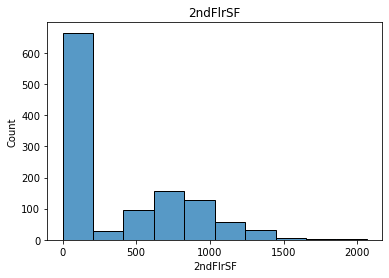

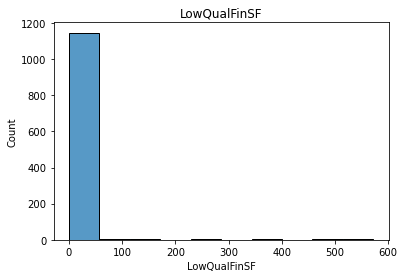

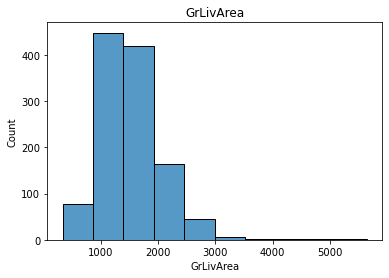

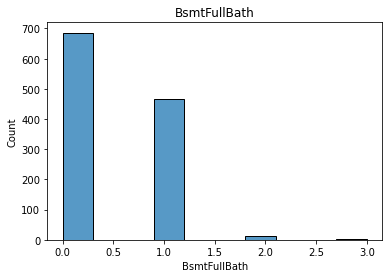

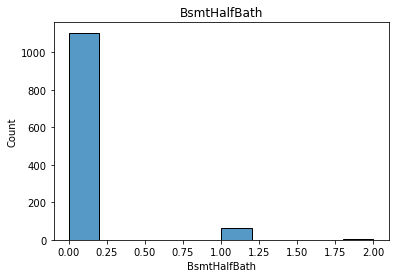

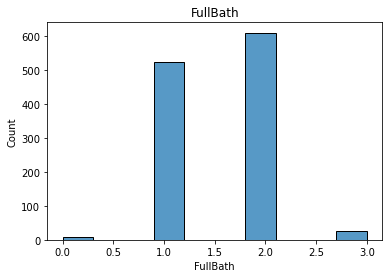

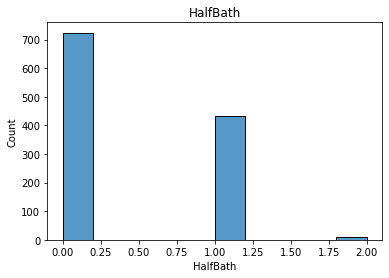

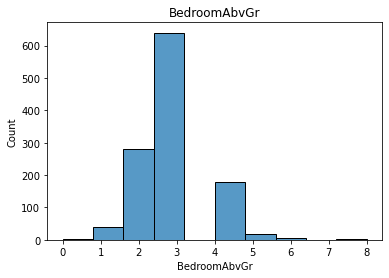

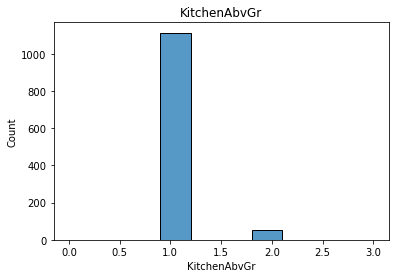

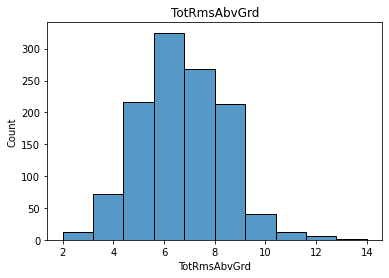

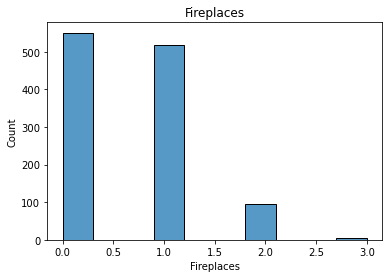

In [31]:
for i in num_columns[10:21]:
    sns.histplot(df[i], bins=10)
    plt.title(i)
    plt.show()

* With 2ndfloorsqft, highest distribution falls around 10 to 200 sqft.
* LowQualityfinal sqft is distributed between 10 to 80.
* GrLivArea - the living area above ground is mostly around 200 to 300 sqft.
* with Basement Bathrooms, mostly the basement doesnt have full or half baths, 1 bathroom is very rarely seem to be built.
* With Bathrooms above grade most houses have 1 or 2 full baths and rarely 1 half baths.
* There are nearly 4-5 bedrooms in the house with most houses have 3 bedrooms as the highest.
* with kitcken, most houses have a single kitchen.
* TotRmsAbvGrd- the total rooms above ground in most houses range from 6-8.
* The number of fireplaces in most house is 1, very rarely its 2.

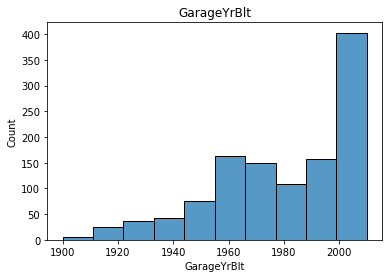

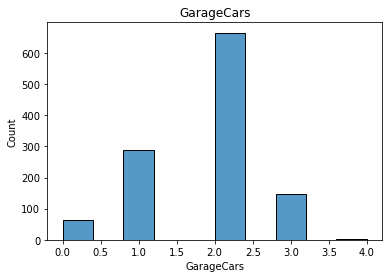

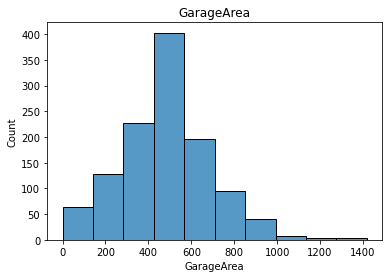

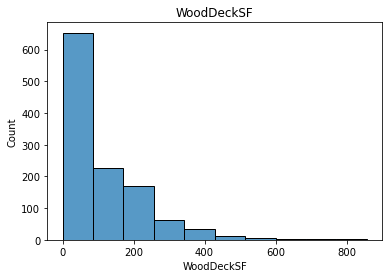

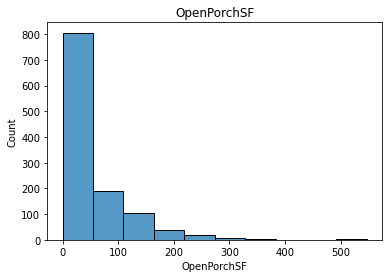

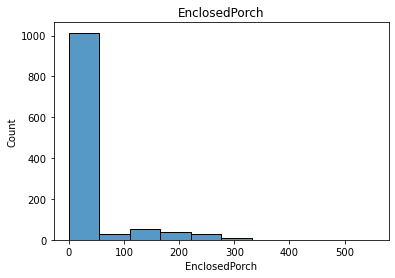

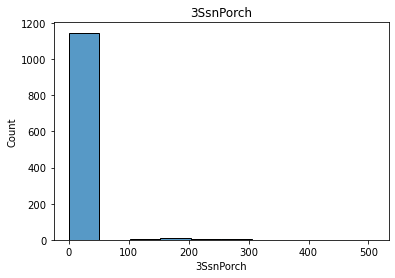

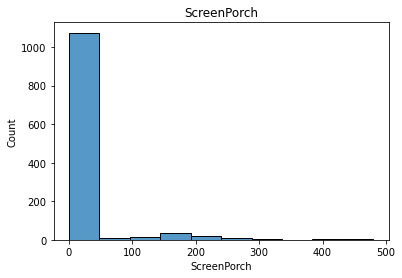

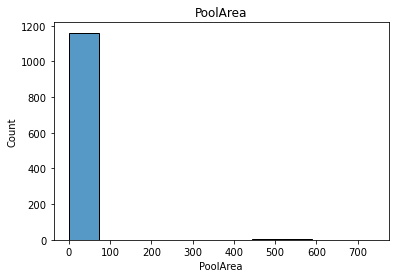

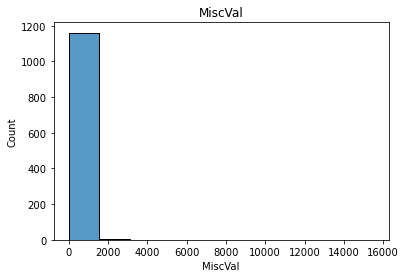

In [33]:
for i in num_columns[21:-1]:
    sns.histplot(df[i], bins=10)
    plt.title(i)
    plt.show()

* GarageYrBlt- Most garages are built after 2000
* GarageCars- Most of the garages can hold 2 to 3 cars in capacity.
* Garagearea- Most garage areas are from 300 to 700sqft.
* WoodDeckSf- This area ranges from 0 to 300 sqft most times
* OpenPorchSf- This area covers upto 0 to 200sqft mostly.
* EnclosedPorch- This area covers upto 0 to 50 sqft in most cases.
* 3SsnPorch- About 0 to 50 sqft area is covered for this area.
* ScreenPorch- About 0 to 50 sqft area is covered for this area
* Poolarea- About 0 to 50 sqft area is covered for this area
* MisVal- The value of miscellaneous feature ranges from 0 to 1800.

# Target Variable

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

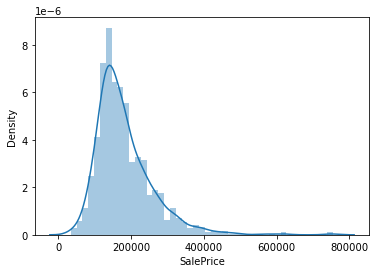

In [32]:
sns.distplot(df['SalePrice'])

The price of the houses ranges from 5000 to 40000$

# Bivariate analysis

In [33]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPo

In [39]:
col1= ['MSZoning', 'LotFrontage', 'LotArea', 'Neighborhood', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterCond', 'BsmtExposure', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'GarageArea', 'YrSold',  'SaleType']

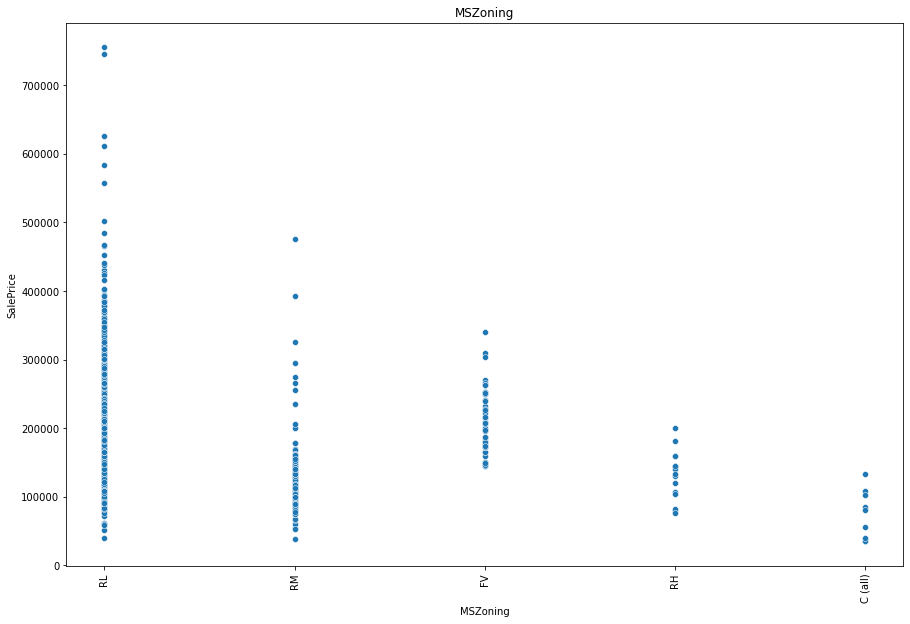

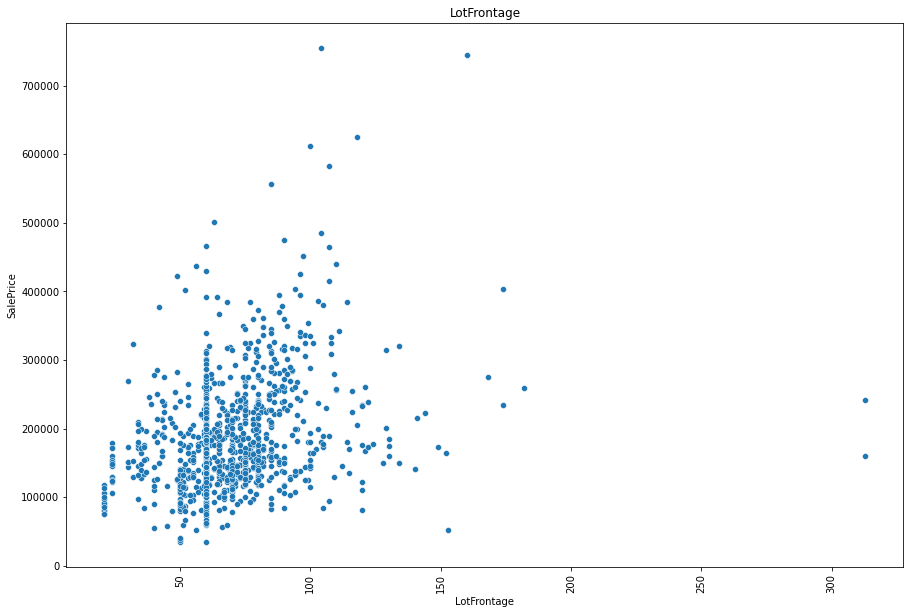

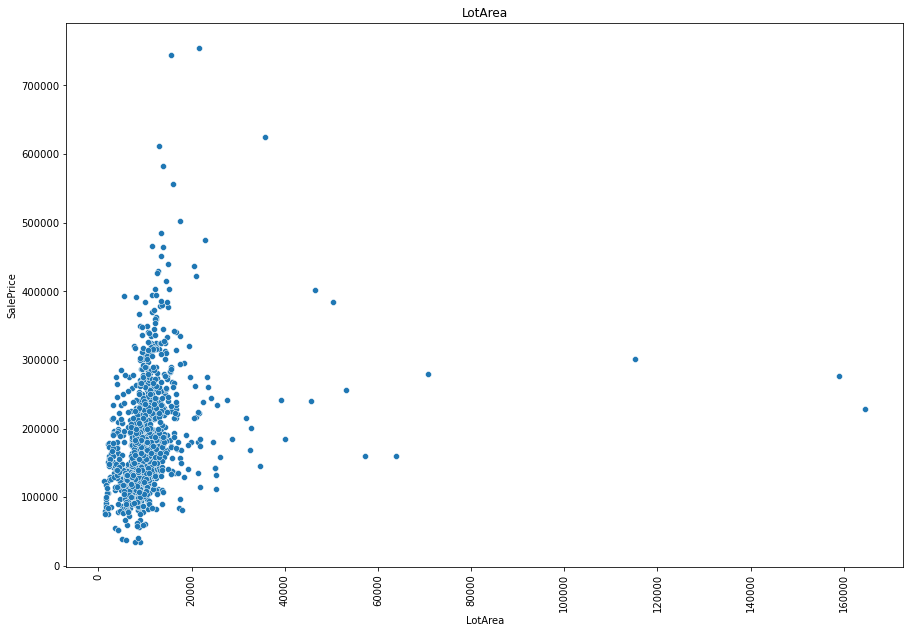

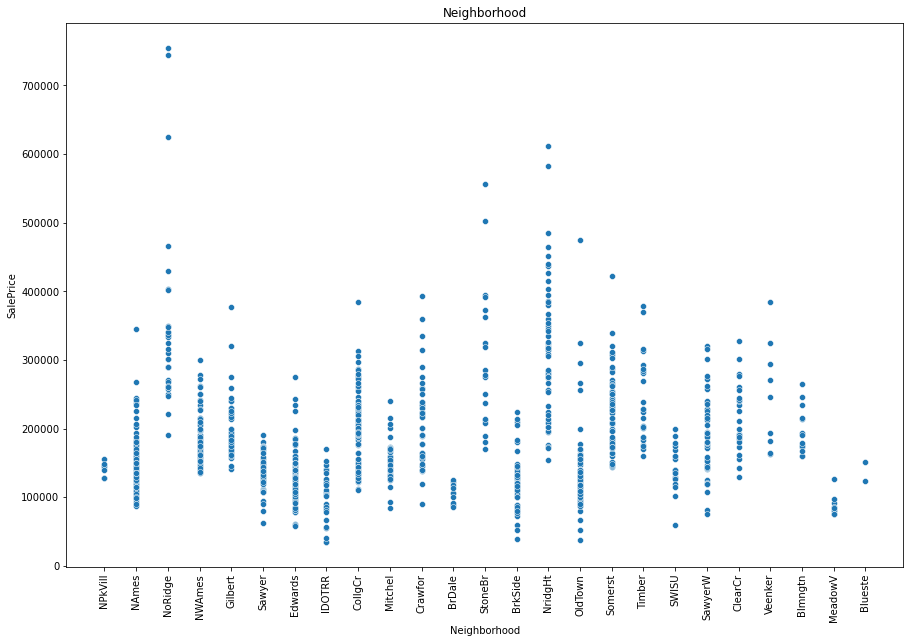

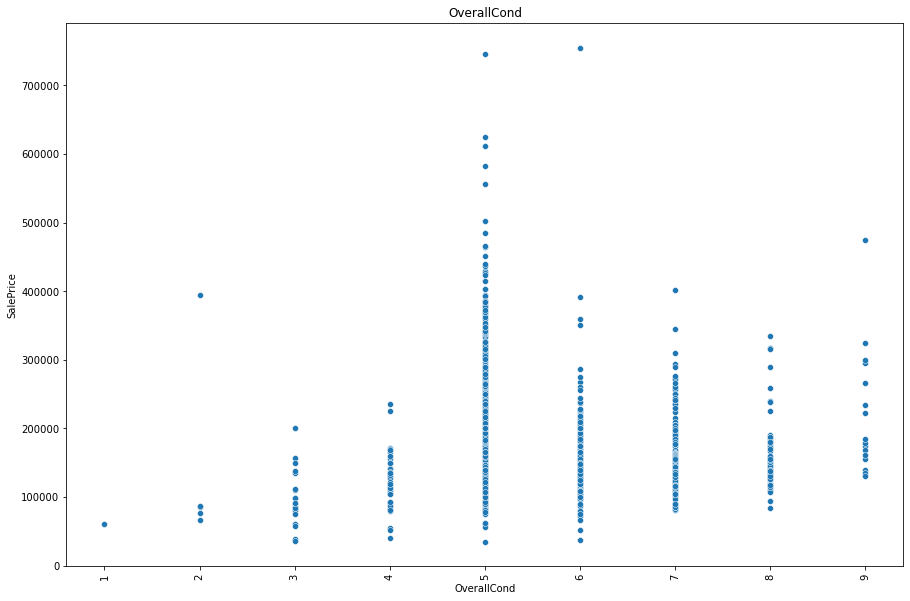

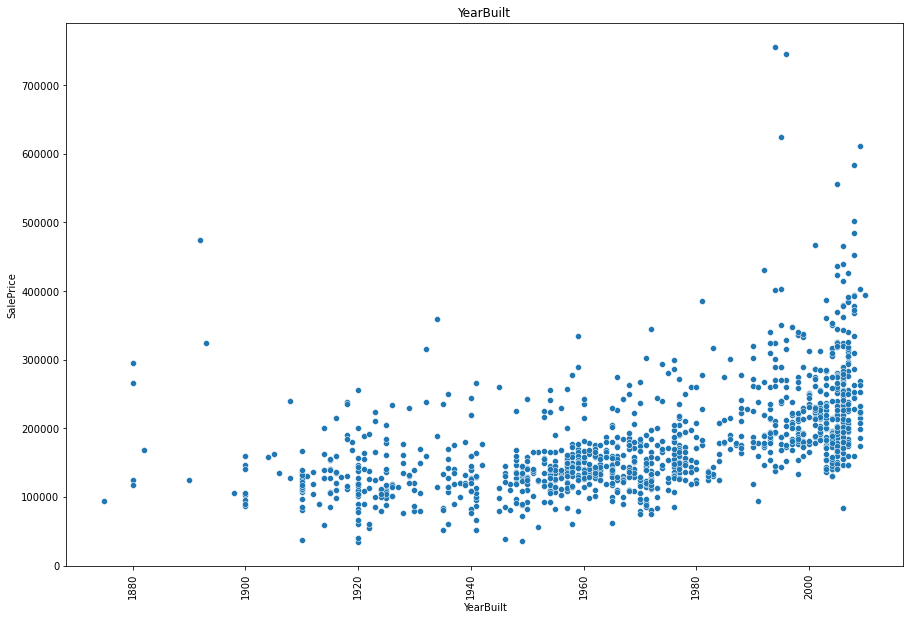

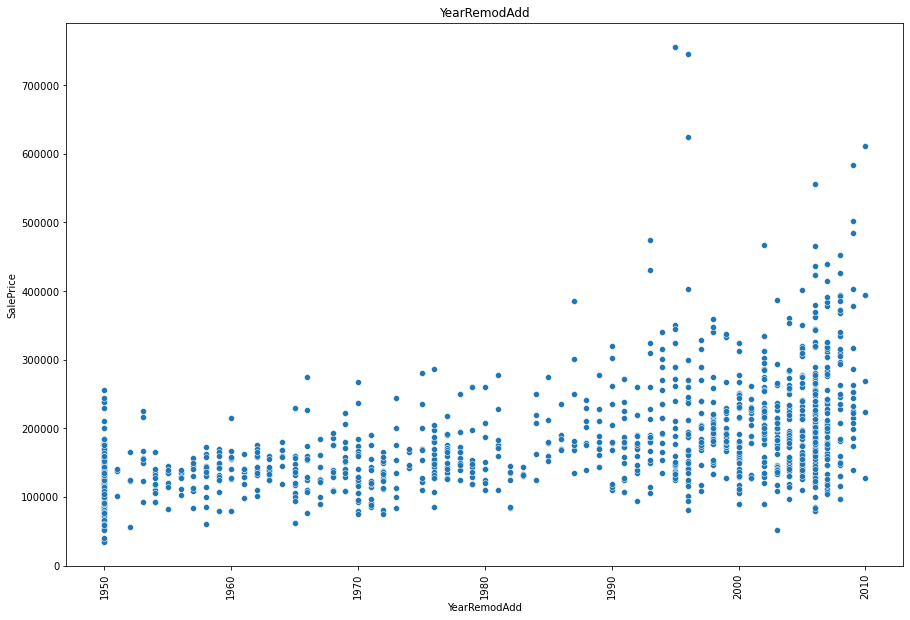

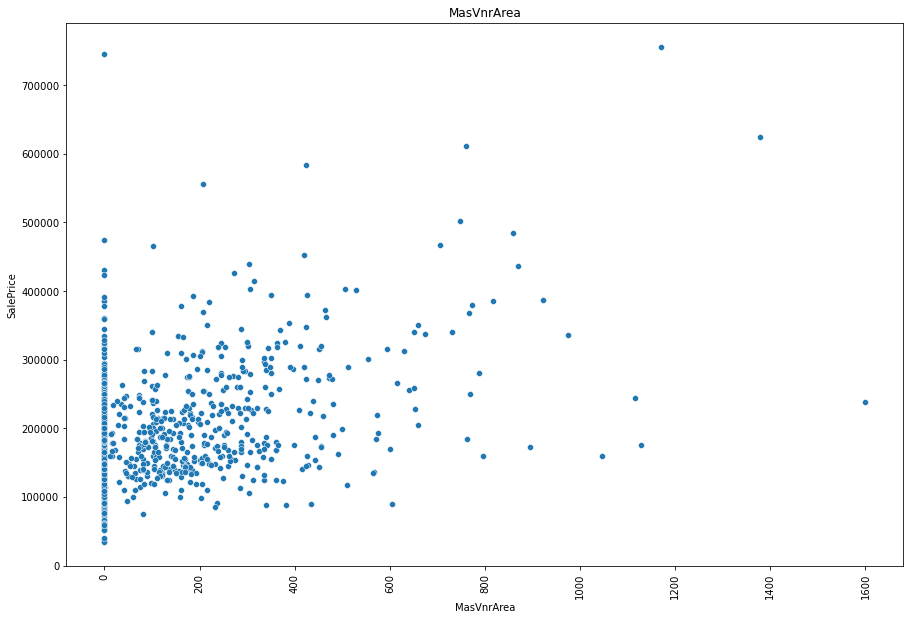

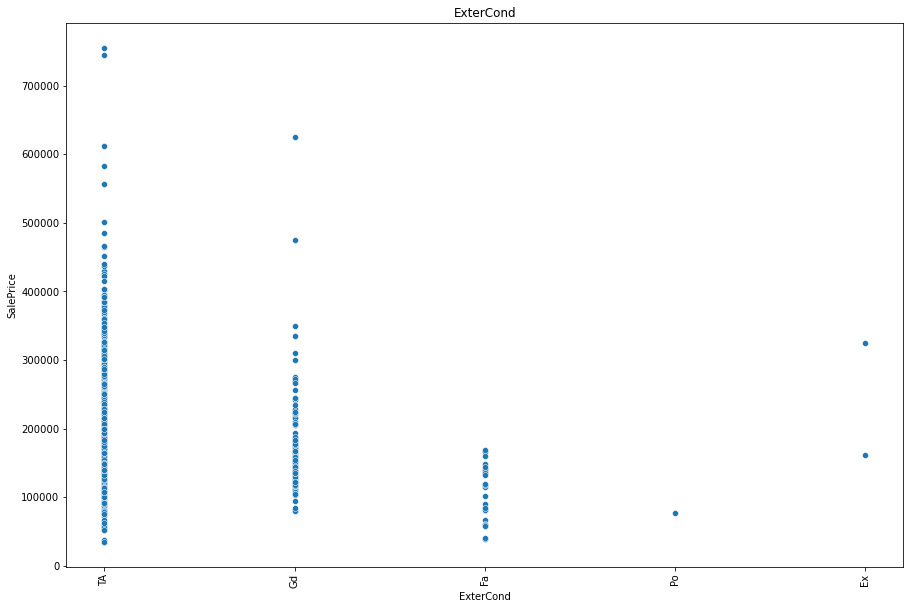

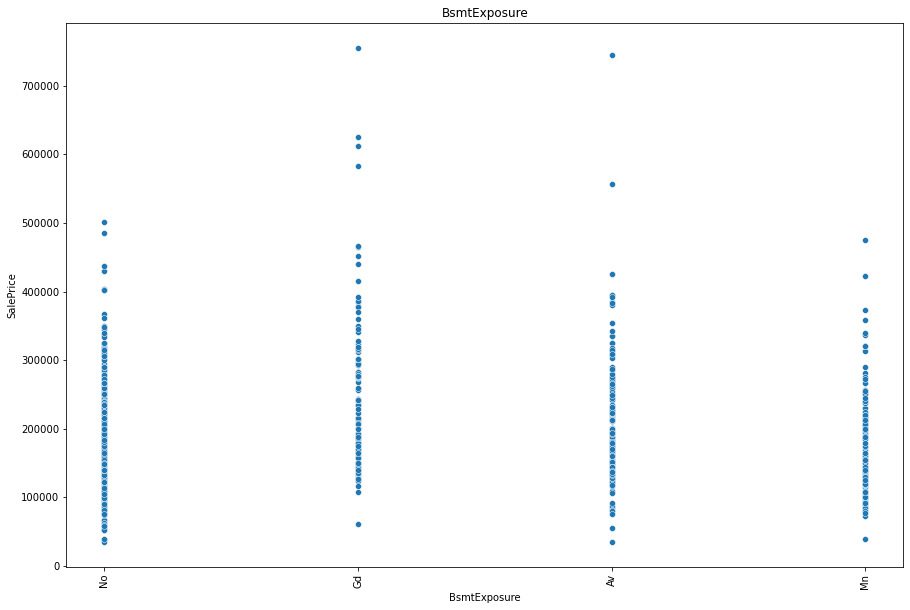

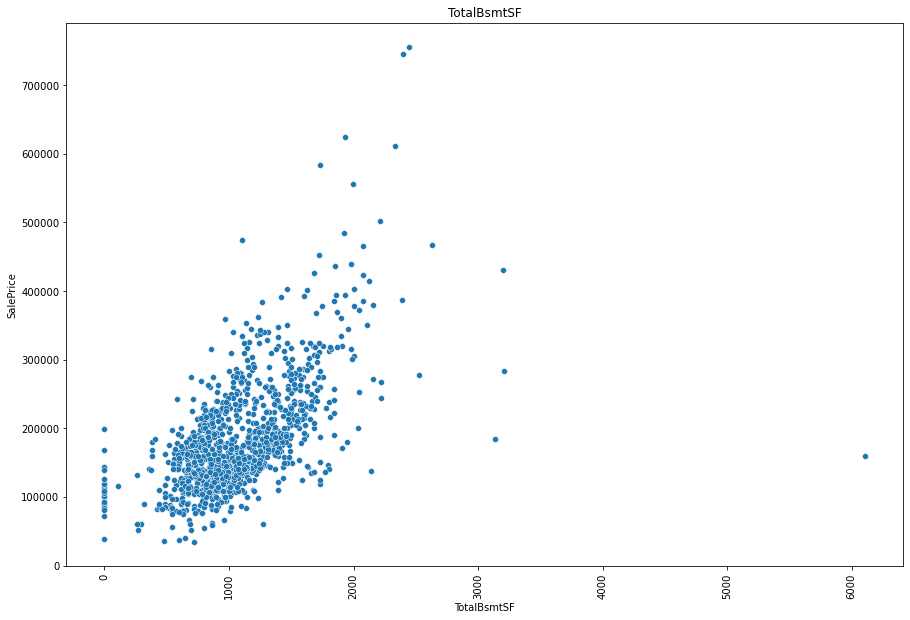

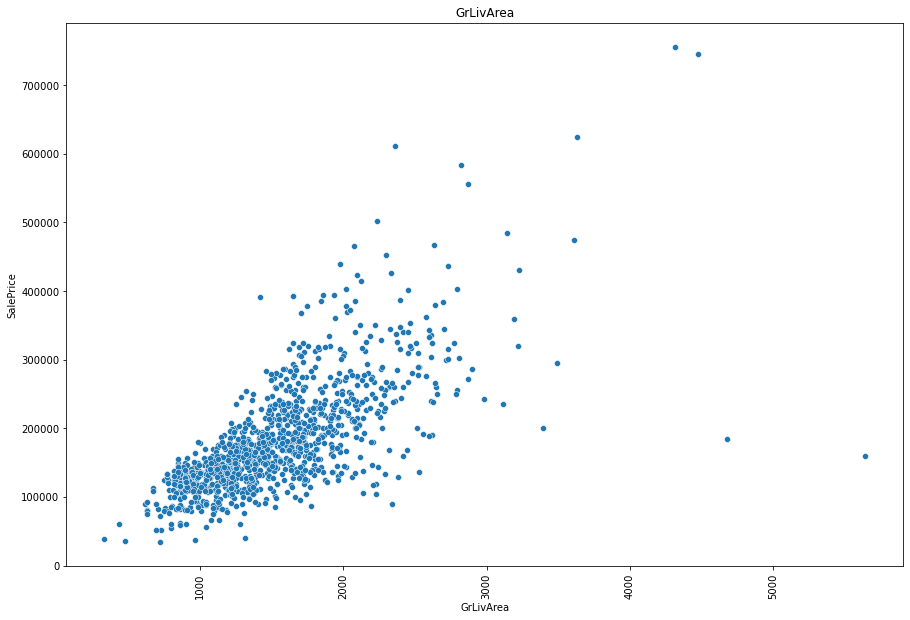

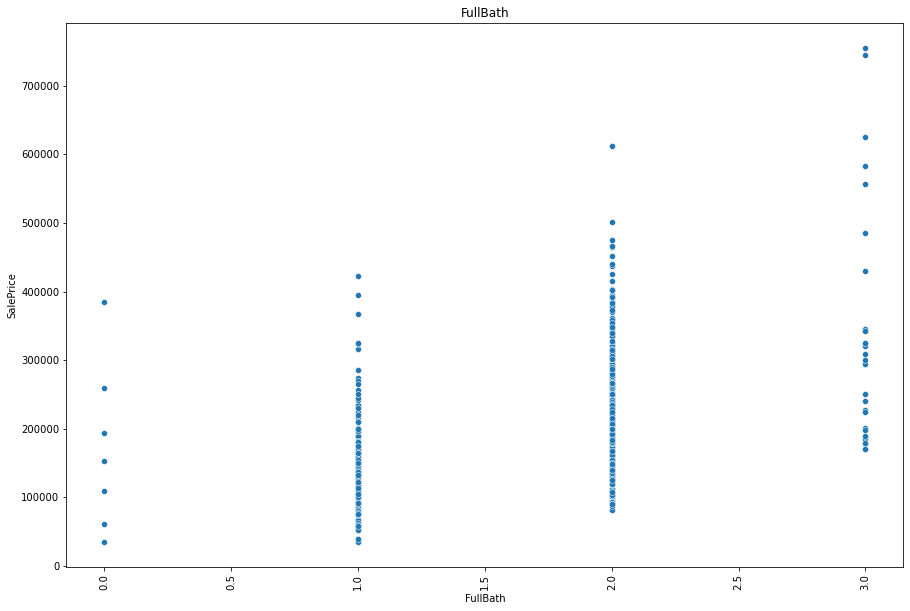

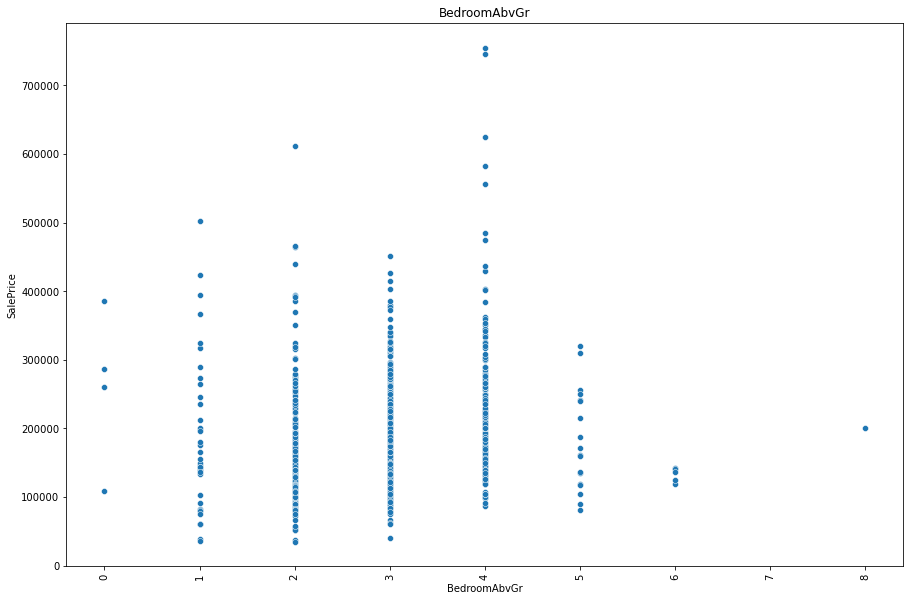

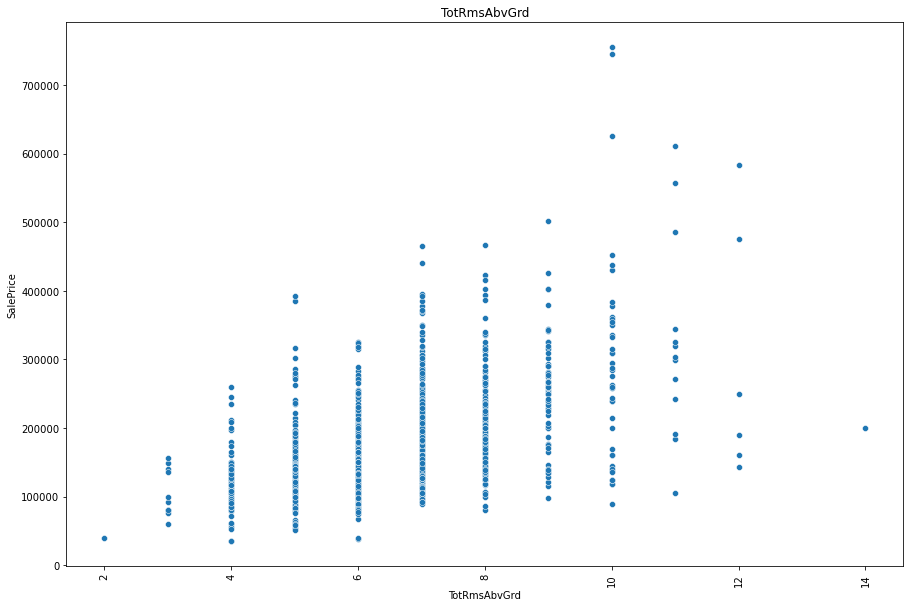

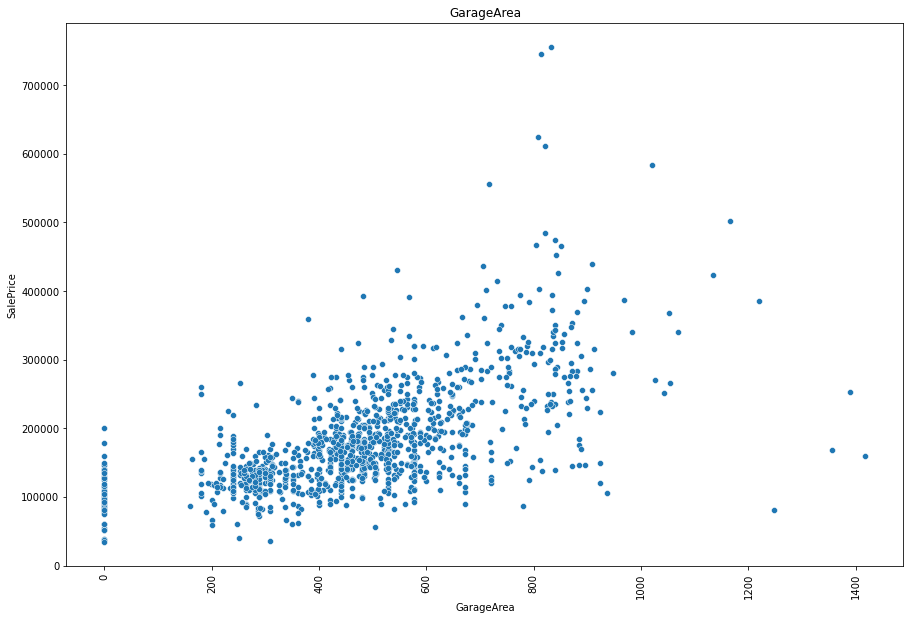

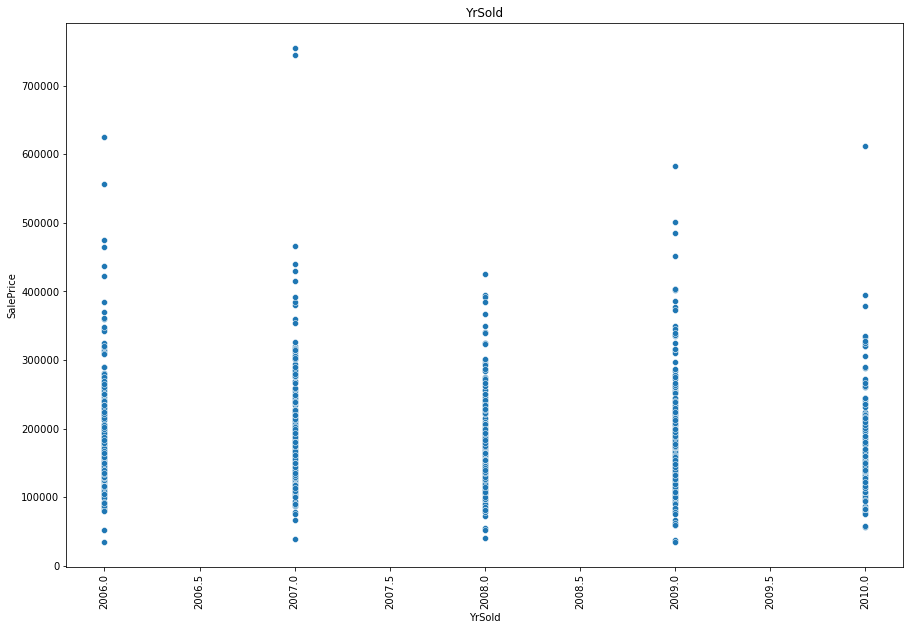

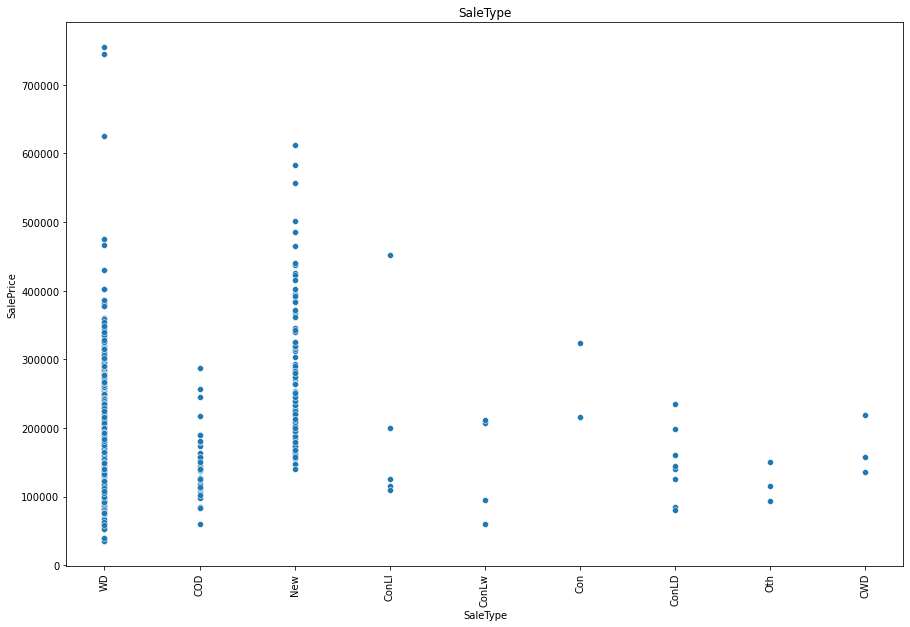

In [41]:
for i in col1:
    plt.figure(figsize=(15,10))
    sns.scatterplot(x=df[i], y= df['SalePrice'])
    plt.xticks(rotation=90)
    plt.title(i)
    plt.show()

* 'MSZoning'- The pricing of the houses are high for Residential Low Density area.
* 'LotFrontage'- The property near to the streetlot seems to have good pricing.
* 'LotArea'- Houses within lot size of 500 - 1500sqft has differeny pricings, so it may depend on various other factors.
* 'Neighborhood'- The houses near college creek and Northridge Heights seems to have higher prices.
* 'OverallCond'- The overall condition of the houses are mostly avreage.
* 'YearBuilt'- Houses built n late 2000s seems to have good pricing.
* 'YearRemodAdd'- Houses reremodelled after 2005 have considerably good pricing.
* 'MasVnrArea'- Masonaryarea doesnt seem to have any relativity to the pricing.
* 'ExterCond'- Average external conditions are seen for good pricing.
* 'BsmtExposure'- Basement exposure is expected to be good for reasonable pricing of the houses.
* 'TotalBsmtSF'- Totalbasementsqft of about 1000sqft is good enough for good pricing.
* 'GrLivArea'- Livingarea above the ground is highly positively correlated increase in living area increases the cost of the house intern.
* 'FullBath'- With increase in number of bathroom the price seems to increase.
* 'BedroomAbvGr'- Price of the house is high with 3 or 4 bedroom houses
* 'TotRmsAbvGrd'- with total rooms above the ground the price of the house increases.
* 'GarageArea'- With a garage area of 800sqft, we shall expect good price.
* 'YrSold'- The price range of houses sold in different years have no significant difference in it.
* 'SaleType'- The houses with warranty deed and new houses are expected to be in good pricing.

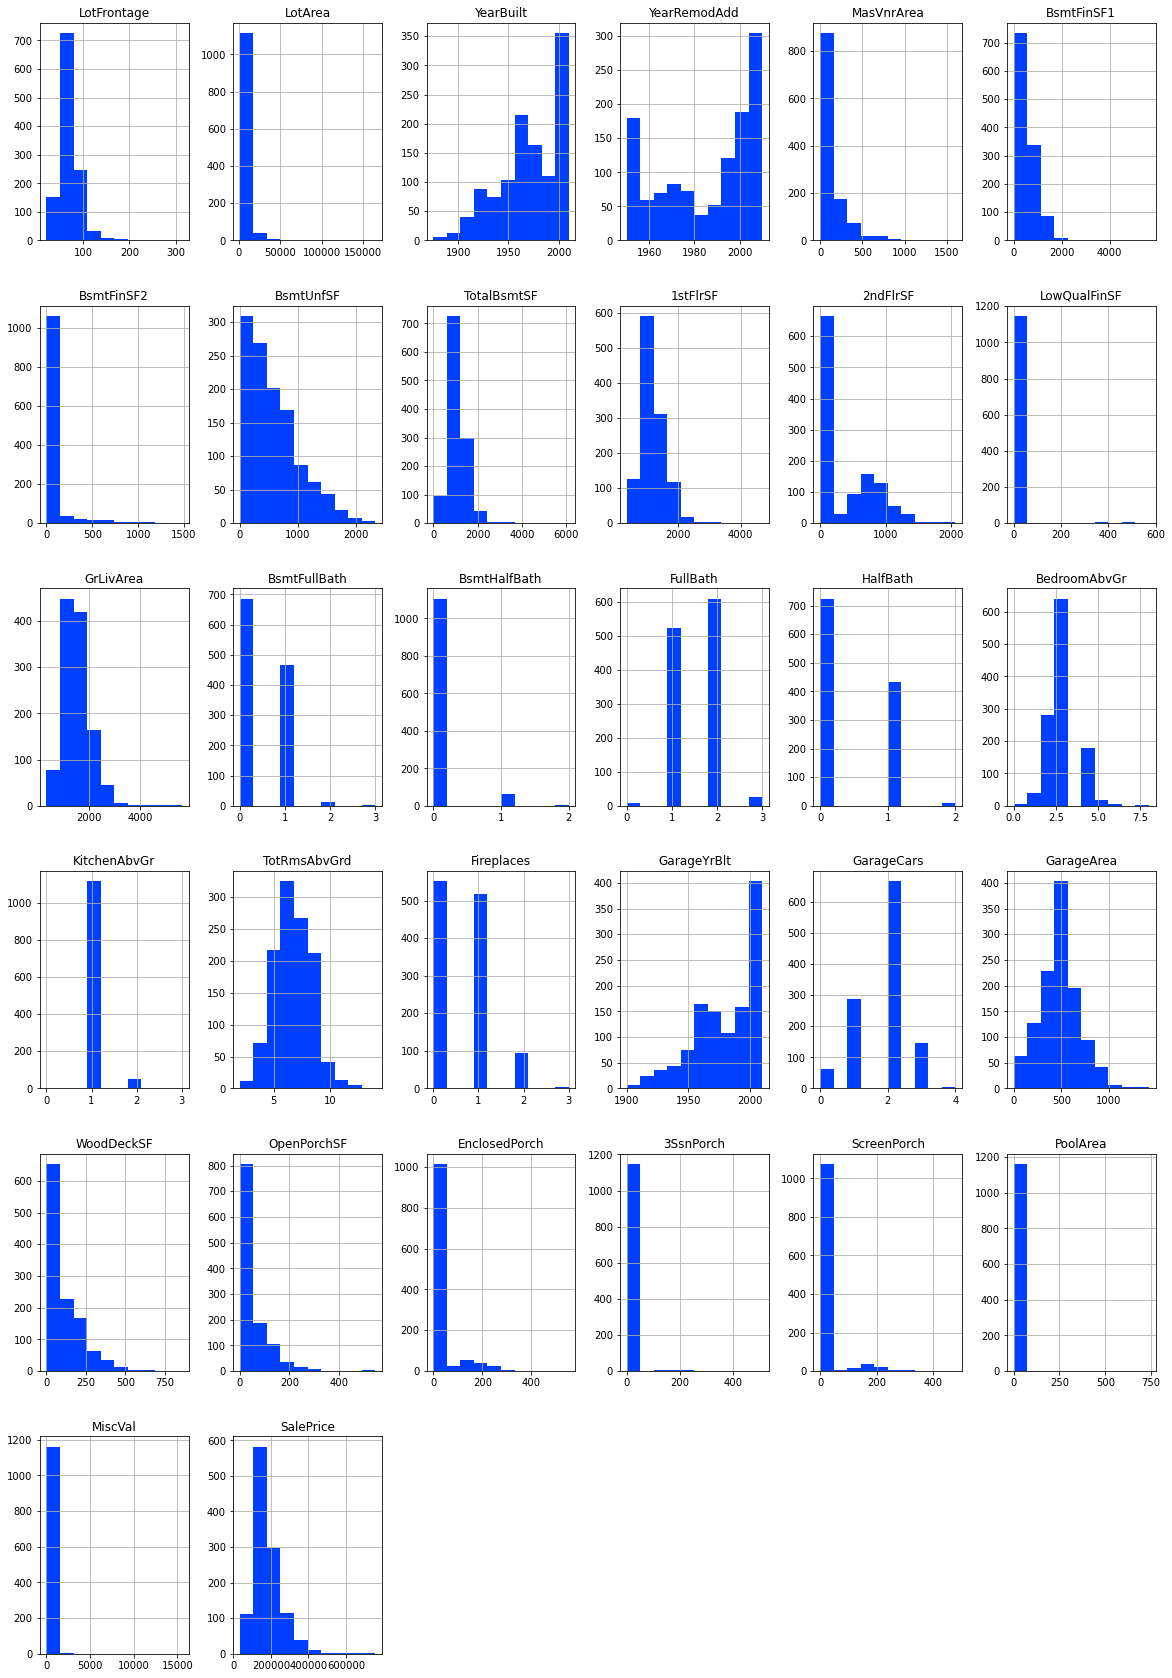

In [43]:
plt.style.use('seaborn-bright')
df.hist(figsize=(20,30))
plt.show()

# Encode Categorical Columns

In [34]:
LE= LabelEncoder()

In [35]:
for i in cat_columns:
    df[i]= LE.fit_transform(df[i])

# Data Description

In [36]:
df.describe()

MSSubClass     MSZoning  LotFrontage        LotArea       Street  \
count  1168.000000  1168.000000  1168.000000    1168.000000  1168.000000   
mean      4.166096     3.013699    68.975171   10484.749144     0.996575   
std       4.139986     0.633120    22.836520    8957.442311     0.058445   
min       0.000000     0.000000    21.000000    1300.000000     0.000000   
25%       0.000000     3.000000    60.000000    7621.500000     1.000000   
50%       4.000000     3.000000    64.000000    9522.500000     1.000000   
75%       6.000000     3.000000    79.250000   11515.500000     1.000000   
max      14.000000     4.000000   313.000000  164660.000000     1.000000   

          LotShape  LandContour    LotConfig    LandSlope  Neighborhood  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000   
mean      1.938356     2.773973     3.004281     0.064212     12.145548   
std       1.412262     0.710027     1.642667     0.284088      6.010364   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       0.000000     3.000000     2.000000     0.000000      7.000000   
50%       3.000000     3.000000     4.000000     0.000000     12.000000   
75%       3.000000     3.000000     4.000000     0.000000     17.000000   
max       3.000000     3.000000     4.000000     2.000000     24.000000   

        Condition1   Condition2     BldgType   HouseStyle  OverallQual  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      2.032534     2.005993     0.476027     3.043664     5.104452   
std       0.871703     0.250035     1.180870     1.898625     1.390153   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000     2.000000     0.000000     2.000000     4.000000   
50%       2.000000     2.000000     0.000000     2.000000     5.000000   
75%       2.000000     2.000000     0.000000     5.000000     6.000000   
max       8.000000     7.000000     4.000000     7.000000     9.000000   

       OverallCond    YearBuilt  YearRemodAdd    RoofStyle     RoofMatl  \
count  1168.000000  1168.000000   1168.000000  1168.000000  1168.000000   
mean      4.595890  1970.930651   1984.758562     1.402397     1.086473   
std       1.124343    30.145255     20.785185     0.832539     0.642848   
min       0.000000  1875.000000   1950.000000     0.000000     0.000000   
25%       4.000000  1954.000000   1966.000000     1.000000     1.000000   
50%       4.000000  1972.000000   1993.000000     1.000000     1.000000   
75%       5.000000  2000.000000   2004.000000     1.000000     1.000000   
max       8.000000  2010.000000   2010.000000     5.000000     7.000000   

       Exterior1st  Exterior2nd   MasVnrType   MasVnrArea    ExterQual  \
count  1168.000000  1168.000000  1168.000000  1168.000000  1168.000000   
mean      8.659247     9.363014     1.746575   102.310078     2.530822   
std       3.097443     3.462380     0.625772   182.047152     0.699425   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       7.000000     7.000000     1.000000     0.000000     2.000000   
50%      11.000000    11.000000     2.000000     0.000000     3.000000   
75%      11.000000    12.000000     2.000000   160.000000     3.000000   
max      13.000000    14.000000     3.000000  1600.000000     3.000000   

         ExterCond   Foundation     BsmtQual     BsmtCond  BsmtExposure  \
count  1168.000000  1168.000000  1168.000000  1168.000000   1168.000000   
mean      3.725171     1.395548     2.231164     2.776541      2.246575   
std       0.744463     0.709379     0.873089     0.685682      1.138629   
min       0.000000     0.000000     0.000000     0.000000      0.000000   
25%       4.000000     1.000000     2.000000     3.000000      2.000000   
50%       4.000000     1.000000     2.000000     3.000000      3.000000   
75%       4.000000     2.000000     3.000000     3.000000      3.000000   
max       4.000000     5.000000     3

The columns Lotfrontage, Lotarea, Massonaryarea, Basementfinishedarea, Basementunfinishedarea have outliers in it, since the difference between 75th percentile and max values are higher.

# To Find Correlation

In [37]:
df.corr()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass       1.000000  0.013516    -0.287453 -0.120690 -0.029520   
MSZoning         0.013516  1.000000    -0.066533 -0.023328  0.140215   
LotFrontage     -0.287453 -0.066533     1.000000  0.265609 -0.032807   
LotArea         -0.120690 -0.023328     0.265609  1.000000 -0.263973   
Street          -0.029520  0.140215    -0.032807 -0.263973  1.000000   
LotShape         0.076645  0.053655    -0.081616 -0.189201 -0.012941   
LandContour     -0.021033  0.001175    -0.075284 -0.159038  0.105226   
LotConfig        0.066929 -0.027246    -0.154986 -0.152063  0.000153   
LandSlope       -0.022919 -0.023952     0.026002  0.395410 -0.141572   
Neighborhood     0.009875 -0.251833     0.067495  0.010707  0.001420   
Condition1      -0.046613 -0.025651    -0.035085  0.029520  0.002189   
Condition2      -0.021658  0.031959     0.002127  0.040096  0.001406   
BldgType         0.699825 -0.024776    -0.389578 -0.215345 -0.013606   
HouseStyle       0.436668 -0.110991     0.044769 -0.040637  0.016793   
OverallQual      0.093762 -0.134037     0.233914  0.107188  0.057140   
OverallCond     -0.056259  0.189553    -0.049850  0.017513  0.031082   
YearBuilt        0.030132 -0.299732     0.103711  0.005506  0.020292   
YearRemodAdd     0.057686 -0.174586     0.095187  0.027228  0.057866   
RoofStyle       -0.109904  0.000913     0.147682  0.038615 -0.006875   
RoofMatl        -0.021178  0.009719     0.071825  0.194142  0.007889   
Exterior1st     -0.088935 -0.012037     0.094989  0.048265  0.012482   
Exterior2nd     -0.111097  0.005548     0.114741  0.027328  0.014618   
MasVnrType      -0.027399 -0.006370    -0.014712 -0.009525 -0.000321   
MasVnrArea       0.036859 -0.063862     0.187395  0.121086  0.024583   
ExterQual       -0.028107  0.184815    -0.175356 -0.057865  0.044509   
ExterCond        0.010931 -0.099269     0.047229  0.011438  0.017738   
Foundation       0.069520 -0.244844     0.088361 -0.021195  0.032701   
BsmtQual        -0.072980  0.122932    -0.170934 -0.064983 -0.034851   
BsmtCond        -0.024949  0.003110     0.040086  0.015709 -0.019112   
BsmtExposure    -0.106130  0.038103    -0.115303 -0.134431  0.064206   
BsmtFinType1     0.030877  0.022549    -0.004085 -0.050274 -0.008214   
BsmtFinSF1      -0.055242 -0.034161     0.211540  0.221851 -0.009066   
BsmtFinType2     0.023123 -0.026687     0.017944 -0.065298  0.036382   
BsmtFinSF2      -0.069171  0.027055    -0.007767  0.056656  0.003550   
BsmtUnfSF       -0.134320 -0.032638     0.130721  0.006600  0.024205   
TotalBsmtSF     -0.219841 -0.058896     0.351242  0.259733  0.016422   
Heating          0.069221  0.051188    -0.022478 -0.020394  0.006981   
HeatingQC       -0.000882  0.119852    -0.089188 -0.003337 -0.047968   
CentralAir      -0.106946 -0.015887     0.064013  0.051182  0.043024   
Electrical       0.052898 -0.079205     0.062261  0.050388  0.038720   
1stFlrSF        -0.213336 -0.033095     0.390769  0.312843  0.011486   
2ndFlrSF         0.351164 -0.048968     0.089787  0.059803  0.040957   
LowQualFinSF     0.056309  0.012098     0.013729 -0.001915  0.007352   
GrLivArea        0.139803 -0.064125     0.365560  0.281360  0.043322   
BsmtFullBath     0.002956 -0.007287     0.079011  0.142387 -0.036483   
BsmtHalfBath     0.024663  0.006345     0.001207  0.059282  0.013788   
FullBath         0.178100 -0.188837     0.169795  0.123197  0.033208   
HalfBath         0.197825 -0.121209     0.039778  0.007271  0.045146   
BedroomAbvGr     0.034299 -0.001906     0.230661  0.117351  0.027587   
KitchenAbvGr     0.324594  0.026744     0.004392 -0.013075  0.012304   
KitchenQual     -0.018333  0.111689    -0.184846 -0.064278 -0.012056   
TotRmsAbvGrd     0.117793 -0.031062     0.315558  0.184546  0.038259   
Functional       0.040881 -0.091684     0.039358 -0.033165 -0.015309   
Fireplaces      -0.010739  0.010658     0.203824  0.285983  0.010574   
GarageType       0.060986  0.117025    -0.180567 -0.110

<AxesSubplot:>

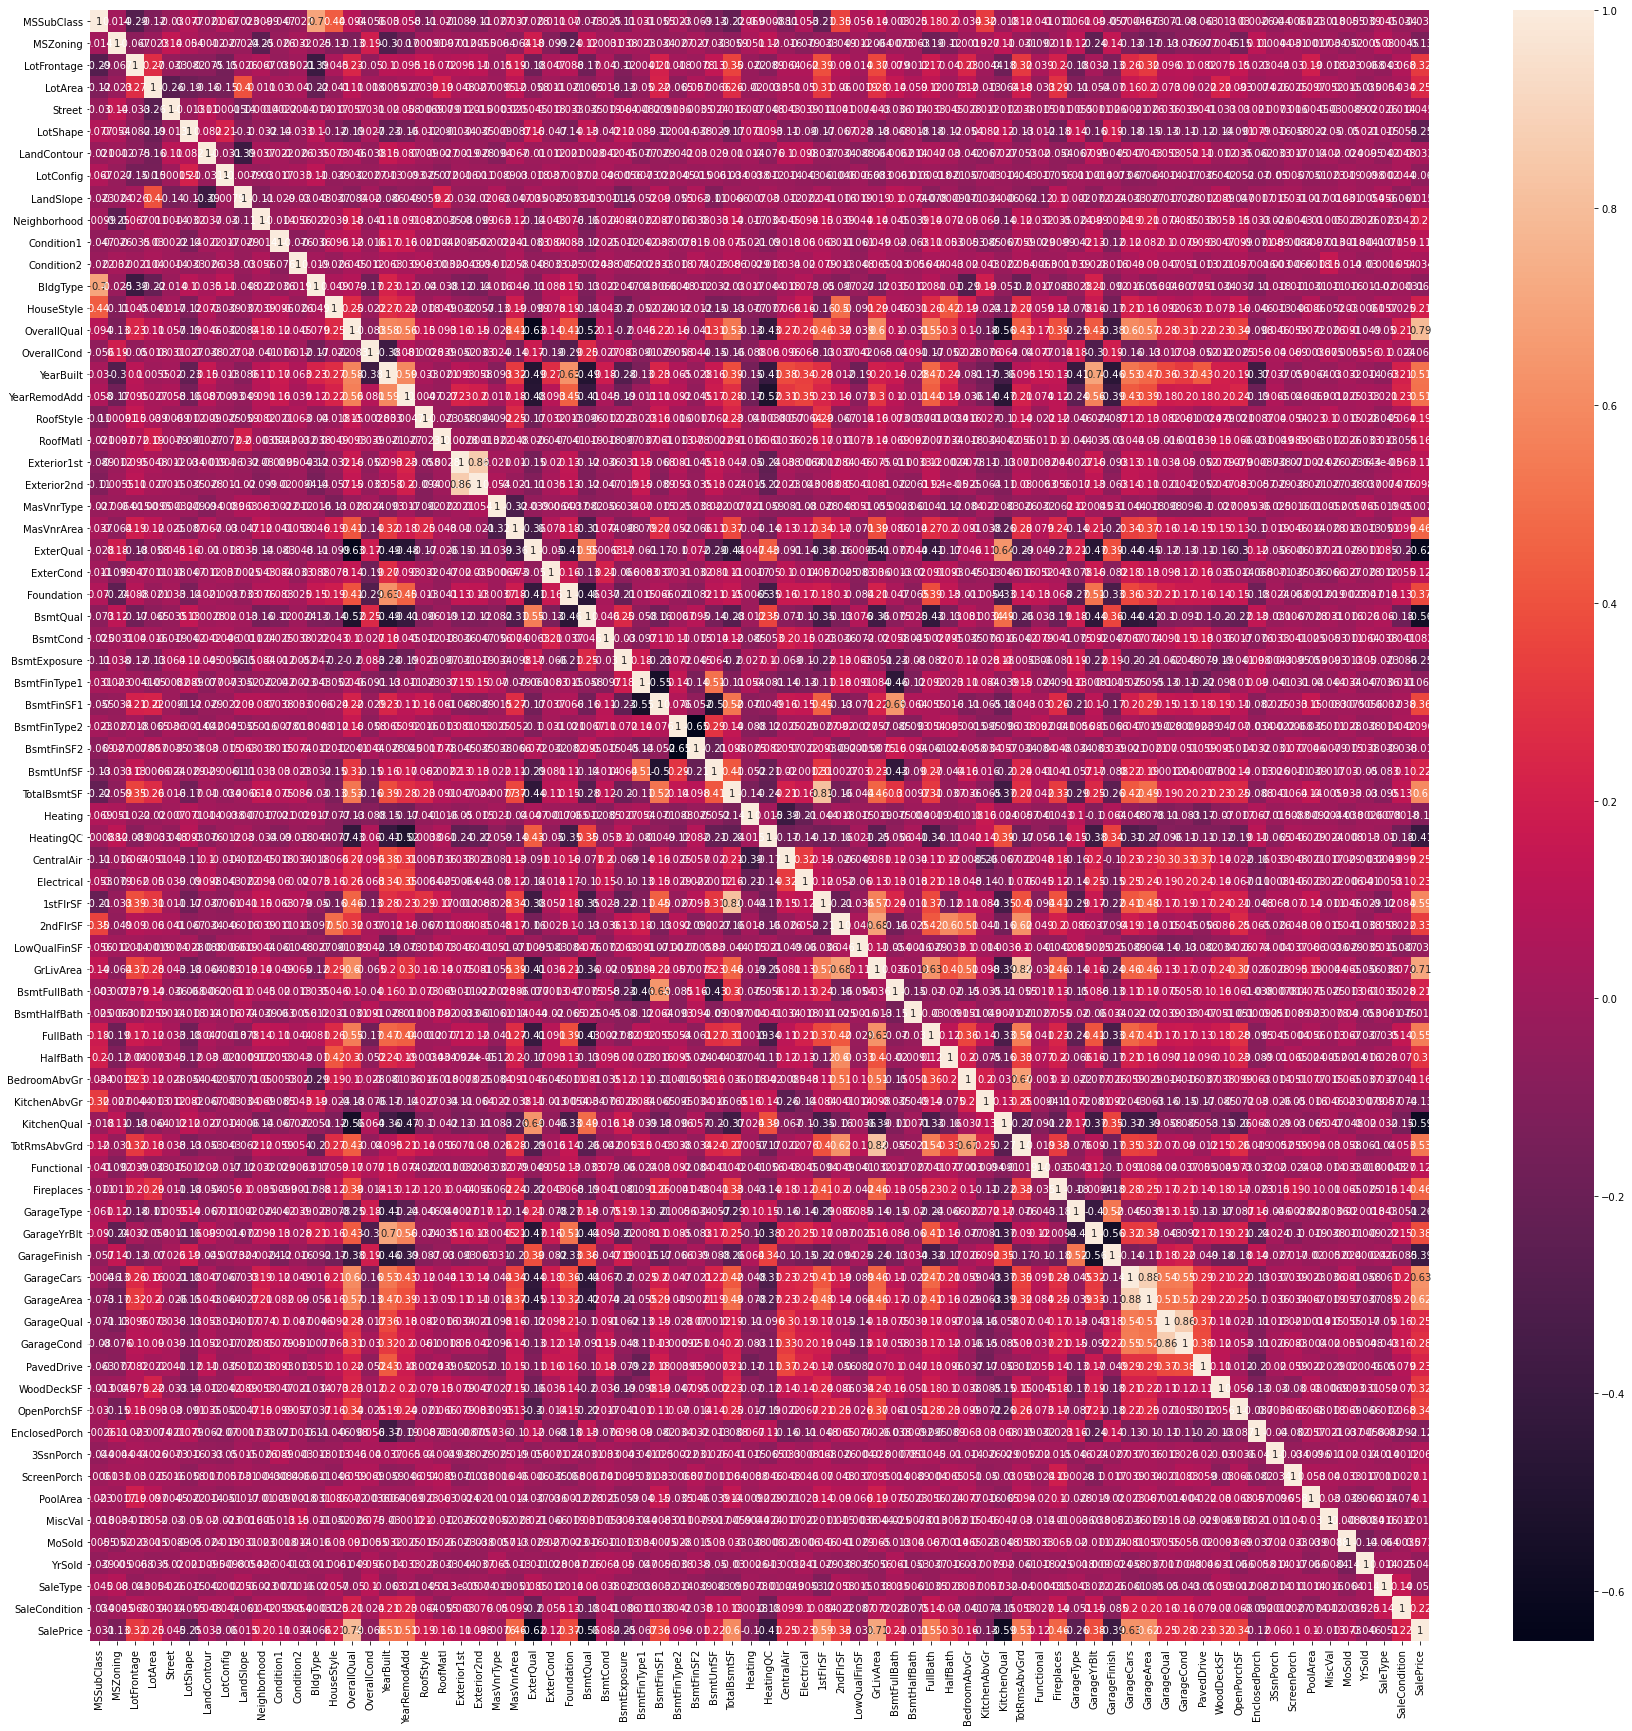

In [49]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True)

We shall see the Multicollinearity of columns with VIF.

# Check For Multi Collinearity- VIF

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
df1=df.drop('SalePrice', axis=1)

In [40]:
df1

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0             11         3         60.0     4928       1         0   
1              0         3         95.0    15865       1         0   
2              5         3         92.0     9920       1         0   
3              0         3        105.0    11751       1         0   
4              0         3         60.0    16635       1         0   
5              5         3         58.0    14054       1         0   
6              0         3         60.0    11341       1         0   
7              0         3         88.0    13125       1         3   
8              0         3         70.0     9170       1         3   
9              4         3         80.0     8480       1         3   
10             4         4         50.0     8600       1         3   
11             5         3         44.0     9548       1         0   
12             0         3        129.0     9196       1         0   
13             0         3         80.0     8892       1         0   
14             4         3         59.0    16466       1         0   
15             6         3         55.0    10592       1         3   
16             1         4         60.0     5890       1         3   
17             0         3         64.0     7314       1         3   
18             0         3         60.0     7917       1         0   
19            12         4         24.0     2016       1         3   
20             5         3         80.0    12435       1         3   
21             9         3         70.0     8445       1         3   
22             0         3         68.0     9717       1         3   
23             0         3         60.0    10659       1         0   
24             0         3         71.0     9230       1         3   
25             0         3         60.0    21000       1         3   
26             1         3         60.0    25339       1         3   
27             0         3         88.0    11394       1         3   
28             3         4         58.0     6380       1         3   
29             6         3         74.0    11988       1         0   
30            11         3         61.0     7658       1         3   
31             5         4         60.0     3378       1         3   
32            10         3         60.0    18890       1         0   
33             4         4         60.0    12358       1         0   
34             5         3         60.0    14762       1         1   
35             0         3        120.0    10356       1         3   
36             0         3         80.0    10400       1         3   
37             0         3         84.0    12615       1         3   
38             9         3         60.0     7540       1         0   
39             2         4         50.0     9100       1         3   
40             0         3        141.0    31770       1         0   
41             0         3         70.0    13300       1         3   
42            12         1         30.0     3180       1         3   
43            12         4         24.0     2522       1         3   
44             8         3         65.0     8385       1         3   
45             0         3         76.0     8314       1         3   
46             5         3         60.0     8123       1         0   
47             0         4        100.0    12000       1         3   
48             0         3         50.0     5000       1         3   
49             0         3         70.0     7931       1         3   
50             0         3         85.0    14331       1         3   
51             4         4         60.0    10440       1         3   
52             1         3         60.0     8400       1         3   
53             0         3         64.0     8712       1         0   
54             0         3         60.0    11100       1         3   
55             0         3         75.0     9742       1         3   
56             0

In [41]:
def vif_fun():
    vif=pd.DataFrame()
    vif['vif_factor']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif['features']= df1.columns
    return(vif)

In [42]:
vif_fun()

vif_factor       features
0   1.101051e+01     MSSubClass
1   3.177803e+01       MSZoning
2   1.709664e+01    LotFrontage
3   4.124796e+00        LotArea
4   3.488099e+02         Street
5   3.627285e+00       LotShape
6   2.161462e+01    LandContour
7   4.999801e+00      LotConfig
8   1.671206e+00      LandSlope
9   6.453751e+00   Neighborhood
10  7.409598e+00     Condition1
11  7.261153e+01     Condition2
12  5.192098e+00       BldgType
13  8.737711e+00     HouseStyle
14  5.661677e+01    OverallQual
15  3.425899e+01    OverallCond
16  2.669513e+04      YearBuilt
17  2.098658e+04   YearRemodAdd
18  4.961902e+00      RoofStyle
19  4.754894e+00       RoofMatl
20  3.829808e+01    Exterior1st
21  3.626518e+01    Exterior2nd
22  1.150563e+01     MasVnrType
23  2.261464e+00     MasVnrArea
24  3.767684e+01      ExterQual
25  3.168905e+01      ExterCond
26  9.402157e+00     Foundation
27  1.672252e+01       BsmtQual
28  2.145180e+01       BsmtCond
29  7.427665e+00   BsmtExposure
30  6.371710e+00   BsmtFinType1
31           inf     BsmtFinSF1
32  5.088291e+01   BsmtFinType2
33           inf     BsmtFinSF2
34           inf      BsmtUnfSF
35           inf    TotalBsmtSF
36  1.665231e+01        Heating
37  2.925575e+00      HeatingQC
38  2.503443e+01     CentralAir
39  1.805542e+01     Electrical
40           inf       1stFlrSF
41           inf       2ndFlrSF
42           inf   LowQualFinSF
43           inf      GrLivArea
44  3.863907e+00   BsmtFullBath
45  1.315761e+00   BsmtHalfBath
46  2.713262e+01       FullBath
47  3.570396e+00       HalfBath
48  3.740801e+01   BedroomAbvGr
49  4.504550e+01   KitchenAbvGr
50  1.822399e+01    KitchenQual
51  9.233306e+01   TotRmsAbvGrd
52  4.322732e+01     Functional
53  3.199195e+00     Fireplaces
54  4.428569e+00     GarageType
55  2.073157e+04    GarageYrBlt
56  5.928747e+00   GarageFinish
57  4.016135e+01     GarageCars
58  3.623097e+01     GarageArea
59  6.106905e+01     GarageQual
60  7.195676e+01     GarageCond
61  2.228591e+01     PavedDrive
62  2.048999e+00     WoodDeckSF
63  2.039966e+00    OpenPorchSF
64  1.423507e+00  EnclosedPorch
65  1.075419e+00      3SsnPorch
66  1.248150e+00    ScreenPorch
67  1.173471e+00       PoolArea
68  1.093156e+00        MiscVal
69  5.369306e+00         MoSold
70  3.101309e+00         YrSold
71  2.506239e+01       SaleType
72  1.498651e+01  SaleCondition

The columns BsmtFinSf1, BsmtFinSf2,BsmtUnfSf, TotalBsmtSf, 1stFlrSf, 2ndFlrSf, LowQualFinSf,GrLiveArea are highly correlated to eachother, in which GrLiveArea contributes more to the target so dropping the other columns.

In [43]:
df1.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF'], axis=1, inplace=True)

In [44]:
vif_fun()

vif_factor       features
0       9.643242     MSSubClass
1      31.699418       MSZoning
2      16.907809    LotFrontage
3       4.090533        LotArea
4     347.736286         Street
5       3.612311       LotShape
6      21.457901    LandContour
7       4.987905      LotConfig
8       1.665010      LandSlope
9       6.382976   Neighborhood
10      7.363418     Condition1
11     71.944558     Condition2
12      4.778526       BldgType
13      8.205594     HouseStyle
14     54.432298    OverallQual
15     33.823379    OverallCond
16  25918.378147      YearBuilt
17  20753.595043   YearRemodAdd
18      4.818082      RoofStyle
19      4.566148       RoofMatl
20     38.110088    Exterior1st
21     36.179934    Exterior2nd
22     11.358472     MasVnrType
23      2.193701     MasVnrArea
24     36.601436      ExterQual
25     31.517522      ExterCond
26      9.007895     Foundation
27     15.812721       BsmtQual
28     21.277859       BsmtCond
29      7.070733   BsmtExposure
30      5.268351   BsmtFinType1
31     25.233876   BsmtFinType2
32     16.432577        Heating
33      2.886479      HeatingQC
34     24.980860     CentralAir
35     18.027727     Electrical
36     65.526509      GrLivArea
37      2.691393   BsmtFullBath
38      1.258520   BsmtHalfBath
39     26.625922       FullBath
40      2.926235       HalfBath
41     36.513360   BedroomAbvGr
42     42.377432   KitchenAbvGr
43     18.151398    KitchenQual
44     91.062913   TotRmsAbvGrd
45     41.686401     Functional
46      3.092457     Fireplaces
47      4.266172     GarageType
48  20088.625999    GarageYrBlt
49      5.904619   GarageFinish
50     39.751282     GarageCars
51     35.268527     GarageArea
52     60.609507     GarageQual
53     71.583262     GarageCond
54     22.183547     PavedDrive
55      2.029774     WoodDeckSF
56      2.021064    OpenPorchSF
57      1.420686  EnclosedPorch
58      1.069232      3SsnPorch
59      1.236823    ScreenPorch
60      1.164327       PoolArea
61      1.084814        MiscVal
62      5.350183         MoSold
63      3.095523         YrSold
64     24.802179       SaleType
65     14.918705  SaleCondition

The columns YearBuild, YearRemodAdd, GarageYrBlt seems to have high collinearity, from which yearbuild has high collinearity with tqrget vqriqble, so dropping the other two columns

In [45]:
df1.drop(['GarageYrBlt', 'YearRemodAdd'], axis=1, inplace=True)

In [46]:
vif_fun()

vif_factor       features
0     9.361605     MSSubClass
1    31.675950       MSZoning
2    16.845125    LotFrontage
3     4.061686        LotArea
4   344.912374         Street
5     3.593294       LotShape
6    21.449015    LandContour
7     4.977259      LotConfig
8     1.657480      LandSlope
9     6.370391   Neighborhood
10    7.353168     Condition1
11   71.793176     Condition2
12    4.720180       BldgType
13    7.965679     HouseStyle
14   53.397137    OverallQual
15   25.165102    OverallCond
16  766.096317      YearBuilt
17    4.816055      RoofStyle
18    4.557505       RoofMatl
19   38.034599    Exterior1st
20   36.068595    Exterior2nd
21   11.348826     MasVnrType
22    2.178726     MasVnrArea
23   36.477817      ExterQual
24   31.334018      ExterCond
25    8.898394     Foundation
26   15.668755       BsmtQual
27   20.970185       BsmtCond
28    7.020216   BsmtExposure
29    5.237291   BsmtFinType1
30   25.178891   BsmtFinType2
31   16.412625        Heating
32    2.839110      HeatingQC
33   24.931278     CentralAir
34   17.965796     Electrical
35   64.396927      GrLivArea
36    2.674088   BsmtFullBath
37    1.257144   BsmtHalfBath
38   26.401746       FullBath
39    2.885374       HalfBath
40   36.028693   BedroomAbvGr
41   42.303042   KitchenAbvGr
42   17.922450    KitchenQual
43   90.409196   TotRmsAbvGrd
44   41.302532     Functional
45    3.079515     Fireplaces
46    4.229249     GarageType
47    5.777544   GarageFinish
48   39.428749     GarageCars
49   33.571034     GarageArea
50   59.109008     GarageQual
51   68.579845     GarageCond
52   21.448590     PavedDrive
53    2.019975     WoodDeckSF
54    2.018184    OpenPorchSF
55    1.365489  EnclosedPorch
56    1.068125      3SsnPorch
57    1.235634    ScreenPorch
58    1.162144       PoolArea
59    1.084544        MiscVal
60    5.348847         MoSold
61    3.081080         YrSold
62   24.642077       SaleType
63   14.910251  SaleCondition

In [47]:
#dropping street column as it contributes the least to price
df1.drop('Street', axis=1, inplace=True)

In [48]:
vif_fun()

vif_factor       features
0     9.349789     MSSubClass
1    30.957881       MSZoning
2    16.834972    LotFrontage
3     3.789965        LotArea
4     3.588235       LotShape
5    21.396788    LandContour
6     4.977245      LotConfig
7     1.657471      LandSlope
8     6.369649   Neighborhood
9     7.350234     Condition1
10   71.793176     Condition2
11    4.713822       BldgType
12    7.962705     HouseStyle
13   53.352934    OverallQual
14   25.084469    OverallCond
15  507.634267      YearBuilt
16    4.815387      RoofStyle
17    4.546361       RoofMatl
18   38.004658    Exterior1st
19   36.050882    Exterior2nd
20   11.332994     MasVnrType
21    2.175613     MasVnrArea
22   35.949428      ExterQual
23   31.315912      ExterCond
24    8.898262     Foundation
25   15.647706       BsmtQual
26   20.917146       BsmtCond
27    7.009013   BsmtExposure
28    5.236298   BsmtFinType1
29   25.149127   BsmtFinType2
30   16.405964        Heating
31    2.837477      HeatingQC
32   24.927597     CentralAir
33   17.936674     Electrical
34   63.955515      GrLivArea
35    2.673803   BsmtFullBath
36    1.256416   BsmtHalfBath
37   26.381478       FullBath
38    2.885151       HalfBath
39   36.020390   BedroomAbvGr
40   42.052763   KitchenAbvGr
41   17.916474    KitchenQual
42   90.375799   TotRmsAbvGrd
43   41.271379     Functional
44    3.077921     Fireplaces
45    4.228837     GarageType
46    5.767679   GarageFinish
47   39.419188     GarageCars
48   33.510861     GarageArea
49   59.073653     GarageQual
50   68.578206     GarageCond
51   21.448350     PavedDrive
52    2.019323     WoodDeckSF
53    2.014016    OpenPorchSF
54    1.361722  EnclosedPorch
55    1.067875      3SsnPorch
56    1.235580    ScreenPorch
57    1.161915       PoolArea
58    1.083743        MiscVal
59    5.347529         MoSold
60    3.079629         YrSold
61   24.627541       SaleType
62   14.910153  SaleCondition

The columns condition2, Overall Quality, GrLiveArea, TotRmsAbvGrd, GarageQual, GarageCond are highly correlated. So dropping condition2, Overall Quality, GarageQual, GarageCond.

In [49]:
df1.drop(['GarageCond', 'GarageQual', 'OverallQual', 'Condition2'], axis=1, inplace=True)

In [50]:
vif_fun()

vif_factor       features
0     9.278384     MSSubClass
1    30.381685       MSZoning
2    16.798855    LotFrontage
3     3.766529        LotArea
4     3.567965       LotShape
5    21.327936    LandContour
6     4.961528      LotConfig
7     1.639095      LandSlope
8     6.303393   Neighborhood
9     7.240833     Condition1
10    4.675130       BldgType
11    7.952955     HouseStyle
12   24.736826    OverallCond
13  425.324635      YearBuilt
14    4.782186      RoofStyle
15    4.514033       RoofMatl
16   37.956153    Exterior1st
17   35.917888    Exterior2nd
18   11.225950     MasVnrType
19    2.149531     MasVnrArea
20   34.239074      ExterQual
21   31.167769      ExterCond
22    8.728201     Foundation
23   15.368512       BsmtQual
24   20.529831       BsmtCond
25    6.947626   BsmtExposure
26    5.180183   BsmtFinType1
27   24.879765   BsmtFinType2
28   16.248164        Heating
29    2.831621      HeatingQC
30   24.353103     CentralAir
31   17.885265     Electrical
32   61.651424      GrLivArea
33    2.667574   BsmtFullBath
34    1.254546   BsmtHalfBath
35   25.941342       FullBath
36    2.865317       HalfBath
37   35.867708   BedroomAbvGr
38   39.530576   KitchenAbvGr
39   17.593538    KitchenQual
40   90.307910   TotRmsAbvGrd
41   40.266231     Functional
42    2.996682     Fireplaces
43    4.059787     GarageType
44    5.255545   GarageFinish
45   36.812358     GarageCars
46   33.058060     GarageArea
47   20.775421     PavedDrive
48    2.015007     WoodDeckSF
49    2.001270    OpenPorchSF
50    1.355962  EnclosedPorch
51    1.066828      3SsnPorch
52    1.222988    ScreenPorch
53    1.159442       PoolArea
54    1.062204        MiscVal
55    5.324162         MoSold
56    3.066976         YrSold
57   24.555099       SaleType
58   14.823704  SaleCondition

In [51]:
df1['SalePrice']= df['SalePrice']

# Check For Skewness

In [52]:
df1.skew().sort_values(ascending=False)

MiscVal          23.065943
PoolArea         13.243711
LotArea          10.659285
Heating          10.103609
3SsnPorch         9.770611
RoofMatl          7.577352
LandSlope         4.812568
KitchenAbvGr      4.365259
BsmtHalfBath      4.264403
ScreenPorch       4.105741
EnclosedPorch     3.043610
Condition1        3.008289
MasVnrArea        2.834658
LotFrontage       2.815783
OpenPorchSF       2.410840
BldgType          2.318657
SalePrice         1.953878
WoodDeckSF        1.504929
RoofStyle         1.498560
GrLivArea         1.449952
GarageType        0.768739
Fireplaces        0.671966
MSSubClass        0.657253
HalfBath          0.656492
TotRmsAbvGrd      0.644657
BsmtFullBath      0.627106
OverallCond       0.580714
HeatingQC         0.449933
HouseStyle        0.285680
BedroomAbvGr      0.243855
MoSold            0.220979
GarageArea        0.189665
YrSold            0.115765
FullBath          0.057809
Neighborhood      0.043735
Foundation       -0.002761
BsmtFinType1     -0.034123
M

In [53]:
df1.drop('SalePrice', axis=1, inplace=True)

We can see certain columns with skewness above the limit of +/-0.5. We can handle them for numeric columns alone, as categorical columns have no impact on it

In [54]:
from sklearn.preprocessing import power_transform
df1_new= power_transform(df1)

In [55]:
df1['SalePrice']= df['SalePrice']

# Check For Outliers

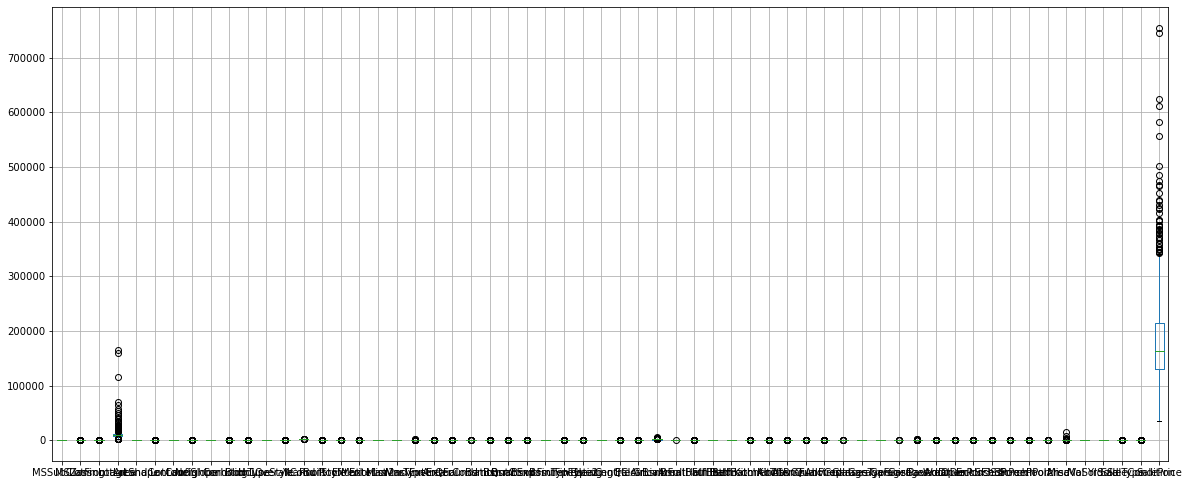

In [56]:
df1.boxplot(figsize=(20,10))
plt.subplots_adjust(bottom=0.25)
plt.show()

There are outliers present in certain columns, so we shall handle it with zscore

In [57]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[1.65141417, 0.02164599, 0.39318669, ..., 0.33003329, 0.20793187,
        0.67631017],
       [1.00673783, 0.02164599, 1.14010261, ..., 0.33003329, 0.20793187,
        1.09423443],
       [0.20151308, 0.02164599, 1.00867782, ..., 0.33003329, 0.20793187,
        1.11687211],
       ...,
       [1.89306435, 0.02164599, 1.97028425, ..., 0.33003329, 0.20793187,
        0.41705186],
       [0.44316326, 4.76211672, 0.83126934, ..., 0.33003329, 0.20793187,
        1.78922393],
       [0.20151308, 0.02164599, 0.39318669, ..., 0.33003329, 0.20793187,
        0.02179027]])

In [58]:
# threshold for zscore is 3........., zscore greater than 3 is outliers
threshold =3
print(np.where(z>3))

(array([   1,    1,    1, ..., 1166, 1166, 1166], dtype=int64), array([ 7, 15, 52, ..., 21, 30, 47], dtype=int64))


In [59]:
df_new= df1[(z<3).all(axis=1)]

# Spliting the data

In [85]:
x= df_new.iloc[:,0:-1]
y=df_new.iloc[:,-1]

The target variable is of continous type, so we shall use regression models.

# Scaling Of Features

In [86]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

MSSubClass  MSZoning  LotFrontage   LotArea  LotShape  LandContour  \
0    1.740058 -0.331058    -0.429437 -1.290465 -1.244202     0.199663   
1    0.274493 -0.331058     1.240732  0.202716 -1.244202     0.199663   
2    0.274493 -0.331058    -0.533823  1.439257 -1.244202     0.199663   
3   -0.946811 -0.331058    -0.429437  0.627758 -1.244202     0.199663   
4   -0.946811 -0.331058     0.092491 -0.021620  0.818660     0.199663   

   LotConfig  LandSlope  Neighborhood  Condition1  BldgType  HouseStyle  \
0   0.610427        0.0      0.235816    0.139067  2.707977   -0.667754   
1  -1.220853        0.0      0.561985    0.139067 -0.399938    0.979516   
2   0.610427        0.0     -0.579608    0.139067 -0.399938    0.979516   
3   0.610427        0.0      1.214324    0.139067 -0.399938   -0.667754   
4  -1.831280        0.0     -0.742692   -2.583442 -0.399938   -0.667754   

   OverallCond  YearBuilt  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0    -0.592865  -0.219957  -0.475926       0.0    -0.271786    -0.139012   
1    -0.592865   0.593396  -0.475926       0.0    -0.618500    -0.741202   
2    -0.592865   1.000073  -0.475926       0.0     0.768357     0.764272   
3     0.512513  -0.992643   2.101165       0.0     1.115071     1.065367   
4     1.617892  -0.667301   2.101165       0.0    -0.618500    -0.741202   

   MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0    0.448575   -0.714777   0.915236   0.303767   -0.953892 -0.260661   
1    0.448575   -0.714777  -1.075598   0.303767    0.786363 -0.260661   
2    0.448575   -0.714777  -1.075598   0.303767    0.786363 -0.260661   
3   -1.115293    0.645286   0.915236   0.303767   -0.953892 -0.260661   
4    0.448575   -0.714777   0.915236   0.303767   -0.953892  1.015073   

   BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  Heating  HeatingQC  \
0  0.226412      0.684142     -1.452526      0.266709      0.0   1.547894   
1  0.226412     -1.734111     -0.344907      0.266709      0.0  -0.783106   
2  0.226412     -1.734111      1.316521      0.266709      0.0  -0.783106   
3  0.226412      0.684142     -1.452526      0.266709      0.0   1.547894   
4  0.226412      0.684142     -1.452526     -5.236861      0.0  -0.783106   

   CentralAir  Electrical  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0         0.0    0.062807  -1.144940     -0.911556           0.0  0.783043   
1         0.0    0.062807   1.308529      1.097025           0.0  0.783043   
2         0.0    0.062807   0.959694     -0.911556           0.0  0.783043   
3         0.0    0.062807  -0.135646      1.097025           0.0 -1.180350   
4         0.0    0.062807  -0.549596      1.097025           0.0 -1.180350   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0 -0.801209     -1.204760           0.0     0.925347     -0.998652   
1  1.248114      0.265798           0.0     0.925347      1.221059   
2  1.248114      1.736356           0.0    -0.443844      1.960963   
3  1.248114      0.265798           0.0     0.925347     -0.998652   
4 -0.801209     -1.204760           0.0     0.925347     -0.258748   

   Functional  Fireplaces  GarageType  GarageFinish  GarageCars  GarageArea  \
0    0.146637    0.646587   -0.544885     -0.014915    0.204382   -0.279888   
1    0.146637    0.646587   -0.544885      1.250385    0.204382   -0.200999   
2    0.146637    0.646587    0.712922     -1.280215    1.649251    0.877151   
3   -4.829232    0.646587    1.970728      1.250385    0.204382    0.182928   
4    0.146637   -1.032559    1.970728      1.250385    0.204382   -0.169444   

   PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0    0.109217   -0.936432     3.214971      -0.282207        0.0    -0.216632   
1    0.109217    0.721812     1.744411      -0.282207        0.0    -0.216632   
2    0.109217   -0.015185    -0.471234      -0.282207        0.0    -0.216632   
3    0.109217   -0.936432    -0.804561      -0.282207        0.0 

# Train the Model

In [87]:
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

# Check the best Random State

# Linear Regression

In [88]:
maxr2=0
maxRS=0

for i in range(1,100):
    xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=20,random_state=i)
    lr=LinearRegression()
    lr.fit(xtrain,ytrain)
    predlr= lr.predict(xtest)
    R2=r2_score(ytest,predlr)
    if R2>maxr2:
        maxr2=R2
        maxRS=i
print("Best R2_score is", maxr2, 'on Random_state',maxRS)

Best R2_score is 0.9582628160205545 on Random_state 32


# To Find the Best Cross Validation Score

In [89]:
pred_tr= lr.predict(xtrain)
pred_ts= lr.predict(xtest)

In [90]:
train_accuracy= r2_score(ytrain,pred_tr)
test_accuracy= r2_score(ytest,pred_ts)

In [91]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score= cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and the accuracy for testing is {test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 0.8214048107817454 and accuracy score for training is 0.8971177975006854 and the accuracy for testing is 0.8331980662106453


At cross fold 3 the cv score is 0.8301284845613024 and accuracy score for training is 0.8971177975006854 and the accuracy for testing is 0.8331980662106453


At cross fold 4 the cv score is 0.8507390302925277 and accuracy score for training is 0.8971177975006854 and the accuracy for testing is 0.8331980662106453


At cross fold 5 the cv score is 0.8541434878413897 and accuracy score for training is 0.8971177975006854 and the accuracy for testing is 0.8331980662106453


At cross fold 6 the cv score is 0.8468226558212333 and accuracy score for training is 0.8971177975006854 and the accuracy for testing is 0.8331980662106453


At cross fold 7 the cv score is 0.8606856836682218 and accuracy score for training is 0.8971177975006854 and the accuracy for testing is 0.8331980662106453


At cross fold 8 the cv score is 0.852178194309841 an

Random_state= 32, CV score is best with cv=7. So we shall use this values to test other models as well

# Check The Accuracy and Error

In [92]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=20, random_state=32)

In [93]:
# Linear Regression Model

lr=LinearRegression()
lr.fit(xtrain,ytrain)
predlr= lr.predict(xtest)
print('R2=', r2_score(ytest,predlr))
print('RMSE=', np.sqrt(mean_squared_error(ytest,predlr)))
print('MBE=', mean_absolute_error(ytest,predlr))

R2= 0.9582628160205545
RMSE= 14558.564022181085
MBE= 11255.094515304452


In [94]:
cv_score=cross_val_score(lr,x,y, cv=7)
print('Cross Validation Score of LinearRegression is:', cv_score.mean())

Cross Validation Score of LinearRegression is: 0.8606856836682218


In [95]:
diff= 0.9582- 0.8611
diff

0.09710000000000008

In [96]:
# Ridge Regression

rd=Ridge(alpha=1e-2, normalize=True)
rd.fit(xtrain,ytrain)
predrd= rd.predict(xtest)
print('R2=', r2_score(ytest,predrd))
print('RMSE=', np.sqrt(mean_squared_error(ytest,predrd)))
print('MBE=', mean_absolute_error(ytest,predrd))

R2= 0.9578555567998859
RMSE= 14629.420694622966
MBE= 11127.49632286352


In [97]:
cv_score=cross_val_score(rd,x,y, cv=7)
print('Cross Validation Score of RidgeRegression is:', cv_score.mean())

Cross Validation Score of RidgeRegression is: 0.8625693946238194


In [98]:
diff= 0.9578- 0.8625
diff

0.09529999999999994

In [99]:
# Lasso Regression

ls=Lasso(alpha=1e-2, normalize=True)
ls.fit(xtrain,ytrain)
predls= ls.predict(xtest)
print('R2=', r2_score(ytest,predls))
print('RMSE=', np.sqrt(mean_squared_error(ytest,predls)))
print('MBE=', mean_absolute_error(ytest,predls))

R2= 0.9582152620657723
RMSE= 14566.855432150187
MBE= 11264.494648999764


In [100]:
cv_score=cross_val_score(ls,x,y, cv=8)
print('Cross Validation Score of LassoRegression is:', cv_score.mean())

Cross Validation Score of LassoRegression is: 0.8521346861456487


In [101]:
diff= 0.9582-0.8521
diff

0.10610000000000008

In [102]:
# Decision Tree Regressor

dtc=DecisionTreeRegressor()
dtc.fit(xtrain,ytrain)
preddtc= dtc.predict(xtest)
print('Score:',dtc.score(xtrain,ytrain))
print('root_mean_squared_error', np.sqrt(mean_squared_error(ytest,preddtc)))
print('mean_absolute_error:', mean_absolute_error(preddtc,ytest))
print('r2_score:', r2_score(preddtc,ytest))

Score: 1.0
root_mean_squared_error 34009.69959364534
mean_absolute_error: 26995.15
r2_score: 0.8081163670619793


In [103]:
cv_score=cross_val_score(dtc,x,y, cv=7)
print('Cross Validation Score of DecisionTreeRegressor is:', cv_score.mean())

Cross Validation Score of DecisionTreeRegressor is: 0.637473261475919


In [105]:
diff= 0.8081- 0.6374
diff

0.17070000000000007

In [106]:
# Random Forest Regressor

rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
predrf= rf.predict(xtest)
print('root mean_squared_error', np.sqrt(mean_squared_error(ytest,predrf)))
print('mean_absolute_error:', mean_absolute_error(predrf,ytest))
print('Rf Score', rf.score(xtrain,ytrain))
print('r2_score:', r2_score(predrf,ytest))

root mean_squared_error 25235.880362157866
mean_absolute_error: 16882.096500000003
Rf Score 0.975894861115888
r2_score: 0.8042618018343919


In [107]:
cv_score=cross_val_score(rf,x,y, cv=7)
print('Cross Validation Score of RandomForestRegressor is:', cv_score.mean())

Cross Validation Score of RandomForestRegressor is: 0.8286928633193096


In [113]:
diff= 0.8286-0.8042
diff

0.024399999999999977

In [109]:
#SVR

svc=SVR()
svc.fit(xtrain,ytrain)
predsvc= svc.predict(xtest)
print('root mean_squared_error', np.sqrt(mean_squared_error(ytest,predsvc)))
print('mean_absolute_error:', mean_absolute_error(predsvc,ytest))
print('Score:', svc.score(xtrain,ytrain))
print('r2_score:', r2_score(predsvc,ytest))

root mean_squared_error 75973.72572615088
mean_absolute_error: 64666.49612864862
Score: -0.021439330154186864
r2_score: -11173441.720453784


In [110]:
# K Neighbors Regressor

knn=KNeighborsRegressor()
knn.fit(xtrain,ytrain)
predknn= knn.predict(xtest)
print('root mean_squared_error', np.sqrt(mean_squared_error(ytest,predknn)))
print('mean_absolute_error:', mean_absolute_error(predknn,ytest))
print('Rf Score', knn.score(xtrain,ytrain))
print('r2_score:', r2_score(predknn,ytest))

root mean_squared_error 28601.791439628396
mean_absolute_error: 21566.880000000005
Rf Score 0.8505748709761425
r2_score: 0.7290407741750269


In [111]:
cv_score=cross_val_score(knn,x,y, cv=7)
print('Cross Validation Score of KNN is:', cv_score.mean())

Cross Validation Score of KNN is: 0.7750910569219766


In [112]:
diff= 0.7750-0.7290
diff

0.04600000000000004

The difference between r2 score and CV score is less with RandomForestRegressor. So we shall improve the performance of the model by Hyper Parameter Tuning.

# HyperParameter Tuning With GridSearchCV

In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
RandomForestRegressor()

RandomForestRegressor()

In [120]:
parameters={'max_features': ["auto", "sqrt", "log2"],
            'min_samples_leaf': [1,2,3],
            'criterion':["squared_error", "absolute_error", "poisson"],
            'max_depth':[3,4,5,6],
            'min_samples_split': [2,3,4,5]}

In [121]:
GCV=GridSearchCV(RandomForestRegressor(), parameters, cv=7, scoring='r2')
GCV.fit(xtrain,ytrain)
GCV.best_params_

{'criterion': 'squared_error',
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 4}

In [122]:
GCV.best_estimator_

RandomForestRegressor(max_depth=6, min_samples_leaf=3, min_samples_split=4)

In [124]:
GCV_pred=GCV.best_estimator_.predict(xtest)
r2_score(ytest,GCV_pred)

0.8684537683571734

In [138]:
#Final Model
flrf=RandomForestRegressor(max_depth=6, 
                         min_samples_split=4,
                         min_samples_leaf=3,
                         max_features= 'auto',
                         criterion = 'squared_error')
flrf.fit(xtrain,ytrain)
predrf= flrf.predict(xtest)
print('root mean_squared_error', np.sqrt(mean_squared_error(ytest,predrf)))
print('mean_absolute_error:', mean_absolute_error(predrf,ytest))
print('Rf Score', rf.score(xtrain,ytrain))
print('r2_score:', r2_score(predrf,ytest))

root mean_squared_error 24090.36338100326
mean_absolute_error: 16044.063605575531
Rf Score 0.975894861115888
r2_score: 0.8301923817103379


After Tuning for Hyper Parameter the accuracy has improved to 83% without underfitting or overfitting. So we shall save the model.

# Save The Model

In [141]:
import pickle
filename= 'House_Price.pkl'
pickle.dump(flrf,open(filename, 'wb'))

# Compare Original results with the Predicted Results

In [142]:
x=np.array(ytest)
predicted= np.array(flrf.predict(xtest))
df_con= pd.DataFrame({'original': x, 'Predicted': predicted}, index= range(len(x)))
df_con

original  Predicted
0     106500  124781.74
1     118000  100021.50
2     315500  274668.85
3     193000  206147.90
4     194000  192085.07
5     244600  236000.72
6     315000  289416.29
7     208500  208261.90
8     214000  204947.91
9     135960  135916.00
10    145000  146213.50
11    262000  242415.72
12    307000  227731.80
13    210000  211883.80
14    156000  145997.00
15    293077  264237.58
16    107500  121743.82
17    132000  119936.08
18    100000  126465.08
19    230000  224160.79

# Important Features

In [140]:
flrf=RandomForestRegressor()
flrf.fit(xtrain, ytrain)
important_features = pd.DataFrame({'Features':x.columns, 'Importance':np.round(rf.feature_importances_,3)})
important_features

Features  Importance
0      MSSubClass       0.002
1        MSZoning       0.002
2     LotFrontage       0.012
3         LotArea       0.020
4        LotShape       0.003
5     LandContour       0.004
6       LotConfig       0.001
7       LandSlope       0.000
8    Neighborhood       0.007
9      Condition1       0.001
10       BldgType       0.001
11     HouseStyle       0.003
12    OverallCond       0.007
13      YearBuilt       0.061
14      RoofStyle       0.001
15       RoofMatl       0.000
16    Exterior1st       0.004
17    Exterior2nd       0.002
18     MasVnrType       0.002
19     MasVnrArea       0.019
20      ExterQual       0.009
21      ExterCond       0.000
22     Foundation       0.001
23       BsmtQual       0.011
24       BsmtCond       0.000
25   BsmtExposure       0.002
26   BsmtFinType1       0.003
27   BsmtFinType2       0.000
28        Heating       0.000
29      HeatingQC       0.002
30     CentralAir       0.000
31     Electrical       0.000
32      GrLivArea       0.422
33   BsmtFullBath       0.008
34   BsmtHalfBath       0.000
35       FullBath       0.142
36       HalfBath       0.001
37   BedroomAbvGr       0.004
38   KitchenAbvGr       0.000
39    KitchenQual       0.016
40   TotRmsAbvGrd       0.005
41     Functional       0.000
42     Fireplaces       0.003
43     GarageType       0.003
44   GarageFinish       0.002
45     GarageCars       0.033
46     GarageArea       0.143
47     PavedDrive       0.000
48     WoodDeckSF       0.011
49    OpenPorchSF       0.009
50  EnclosedPorch       0.001
51      3SsnPorch       0.000
52    ScreenPorch       0.001
53       PoolArea       0.000
54        MiscVal       0.000
55         MoSold       0.008
56         YrSold       0.004
57       SaleType       0.001
58  SaleCondition       0.001

# Testing Dataset

In [159]:
test_df = pd.read_excel(r'C:\python\Housing.test.xlsx')
test_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         HLS    AllPub    Corner       Gtl      StoneBr       Norm   
1         Lvl    AllPub   CulDSac       Gtl      StoneBr       Norm   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Bnk    AllPub    Inside       Gtl      Crawfor       Norm   
4         Lvl    AllPub   CulDSac       Gtl      Somerst      Feedr   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            9            5       2005   
1       Norm   TwnhsE     1Story            8            5       1984   
2       Norm     1Fam     1Story            8            5       2001   
3       Norm     1Fam     2Story            7            7       1941   
4       Norm     1Fam     2Story            6            5       2007   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2006       Hip  CompShg     VinylSd     VinylSd      Stone   
1          1984     Gable  CompShg     HdBoard     HdBoard       None   
2          2001       Hip  CompShg     VinylSd     VinylSd       None   
3          1950     Gable  CompShg     MetalSd     MetalSd       None   
4          2007     Gable  CompShg     VinylSd     VinylSd      Stone   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       200.0        Gd        TA      PConc       Ex       TA           Gd   
1         0.0        Gd        TA     CBlock       Gd       TA           Av   
2         0.0        Gd        TA      PConc       Gd       TA           Av   
3         0.0        TA        TA     CBlock       TA       TA           No   
4        74.0        Gd        TA      PConc       Gd       TA           Mn   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ        1249          Unf           0        673         1922   
1          GLQ        1036          Unf           0        184         1220   
2          Unf           0          Unf           0       1753         1753   
3          Rec         275          Unf           0        429          704   
4          Unf           0          Unf           0        894          894   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr      1922         0             0   
1    GasA        Gd          Y      SBrkr      1360         0             0   
2    GasA        Ex          Y      SBrkr      1788         0             0   
3    GasA        Ex          Y      SBrkr       860       704             0   
4    GasA        Ex          Y      SBrkr       894      1039             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1922             1             0         2         0             3   
1       1360             1             0         1         0             1   
2       1788             0             0         2         0             3   
3       1564             0             0         1         1             3   
4       1933             0             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           1          Gd   
1             1          Gd             4        Typ           1          Ex   
2             1          Ex             7        Typ           1          TA   
3             1          Fa  

In [160]:
test_df.shape

(292, 80)

In [161]:
#Check for null values
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [162]:
print("Missing values in percentage:")
for i in test_df:
    percentage = np.round((test_df[i].isnull().sum()/test_df.shape[0])*100, 3)
    print(i, ":".format(), percentage, '%')

Missing values in percentage:
Id : 0.0 %
MSSubClass : 0.0 %
MSZoning : 0.0 %
LotFrontage : 15.411 %
LotArea : 0.0 %
Street : 0.0 %
Alley : 95.205 %
LotShape : 0.0 %
LandContour : 0.0 %
Utilities : 0.0 %
LotConfig : 0.0 %
LandSlope : 0.0 %
Neighborhood : 0.0 %
Condition1 : 0.0 %
Condition2 : 0.0 %
BldgType : 0.0 %
HouseStyle : 0.0 %
OverallQual : 0.0 %
OverallCond : 0.0 %
YearBuilt : 0.0 %
YearRemodAdd : 0.0 %
RoofStyle : 0.0 %
RoofMatl : 0.0 %
Exterior1st : 0.0 %
Exterior2nd : 0.0 %
MasVnrType : 0.342 %
MasVnrArea : 0.342 %
ExterQual : 0.0 %
ExterCond : 0.0 %
Foundation : 0.0 %
BsmtQual : 2.397 %
BsmtCond : 2.397 %
BsmtExposure : 2.397 %
BsmtFinType1 : 2.397 %
BsmtFinSF1 : 0.0 %
BsmtFinType2 : 2.397 %
BsmtFinSF2 : 0.0 %
BsmtUnfSF : 0.0 %
TotalBsmtSF : 0.0 %
Heating : 0.0 %
HeatingQC : 0.0 %
CentralAir : 0.0 %
Electrical : 0.342 %
1stFlrSF : 0.0 %
2ndFlrSF : 0.0 %
LowQualFinSF : 0.0 %
GrLivArea : 0.0 %
BsmtFullBath : 0.0 %
BsmtHalfBath : 0.0 %
FullBath : 0.0 %
HalfBath : 0.0 %
BedroomAb

dropping columns with more null values

In [163]:
test_df.drop(["Alley", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"], axis=1, inplace=True)

In [164]:
test_df.drop(["Id", "Utilities"], axis=1, inplace=True)

In [171]:
test_df['LotFrontage']= test_df['LotFrontage'].fillna(test_df['LotFrontage'].mode()[0])
test_df['MasVnrType']= test_df['MasVnrType'].fillna('BrkCmn')
test_df['MasVnrArea']= test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mean())
test_df['BsmtQual']= test_df['BsmtQual'].fillna('Fa')
test_df['BsmtCond']= test_df['BsmtCond'].fillna('Po')
test_df['BsmtExposure']= test_df['BsmtExposure'].fillna('Mn')
test_df['BsmtFinType1']= test_df['BsmtFinType1'].fillna('LwQ')
test_df['BsmtFinType2']= test_df['BsmtFinType2'].fillna('GLQ')
test_df['GarageType']= test_df['GarageType'].fillna('2Types')
test_df['GarageYrBlt']= test_df['GarageYrBlt'].fillna(test_df['GarageYrBlt'].mode()[0])
test_df['GarageFinish']= test_df['GarageFinish'].fillna('Fin')
test_df['GarageQual']= test_df['GarageQual'].fillna('Ex')
test_df['GarageCond']= test_df['GarageCond'].fillna('Ex')
test_df['Electrical']= test_df['Electrical'].fillna('SBrKr')

In [172]:
test_df['MSSubClass']=test_df['MSSubClass'].astype('object')
test_df['OverallQual']=test_df['OverallQual'].astype('object')
test_df['OverallCond']=test_df['OverallCond'].astype('object')
test_df['MoSold']=test_df['MoSold'].astype('object')
test_df['YrSold']=test_df['YrSold'].astype('object')

In [173]:
#cat_columns
cat_columns= [x for x in test_df.dtypes.index if test_df.dtypes[x]=='object']
cat_columns

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [174]:
#num_columns
num_columns= [x for x in test_df.dtypes.index if test_df.dtypes[x]== 'int64' or test_df.dtypes[x]=='float64']
num_columns

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [175]:
test_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional  

In [177]:
#Encode Categorical Columns
LE= LabelEncoder()
for i in cat_columns:
    test_df[i]= LE.fit_transform(test_df[i])

In [178]:
test_df.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF'], axis=1, inplace=True)
test_df.drop(['GarageYrBlt', 'YearRemodAdd'], axis=1, inplace=True)
test_df.drop('Street', axis=1, inplace=True)
test_df.drop(['GarageCond', 'GarageQual', 'OverallQual', 'Condition2'], axis=1, inplace=True)

In [181]:
x=test_df
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

MSSubClass  MSZoning  LotFrontage   LotArea  LotShape  LandContour  \
0   -0.980984 -0.287006     1.024350  0.263894 -1.402669    -2.566101   
1    1.608104 -0.287006    -0.270715 -0.363030 -1.402669     0.299297   
2   -0.980984 -0.287006    -0.270715  0.089636  0.745474     0.299297   
3    0.431246 -0.287006     0.476438  0.101809  0.745474    -3.998799   
4    0.195874 -0.287006     1.024350  0.297033 -1.402669     0.299297   

   LotConfig  LandSlope  Neighborhood  Condition1  BldgType  HouseStyle  \
0  -2.001106  -0.226274      1.554460   -0.028763 -0.444642   -0.518671   
1  -1.351136  -0.226274      1.554460   -0.028763  2.722077   -0.518671   
2   0.598774  -0.226274     -1.281387   -0.028763 -0.444642   -0.518671   
3   0.598774  -0.226274     -1.114572   -0.028763 -0.444642    1.011146   
4  -1.351136  -0.226274      1.387645   -1.228602 -0.444642    1.011146   

   OverallCond  YearBuilt  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0    -0.464603   1.065430   1.846195 -0.078757     0.694397     0.733065   
1    -0.464603   0.374523  -0.523427 -0.078757    -1.046066    -1.248926   
2    -0.464603   0.933828   1.846195 -0.078757     0.694397     0.733065   
3     1.419621  -1.040191  -0.523427 -0.078757    -0.610950    -0.588262   
4    -0.464603   1.131230  -0.523427 -0.078757     0.694397     0.733065   

   MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0    1.937091    0.520715  -0.857858   0.326787    0.776109 -2.459127   
1    0.361518   -0.625879  -0.857858   0.326787   -0.518884 -0.246292   
2    0.361518   -0.625879  -0.857858   0.326787    0.776109 -0.246292   
3    0.361518   -0.625879   0.633181   0.326787   -0.518884  0.860126   
4    1.937091   -0.201639  -0.857858   0.326787    0.776109 -0.246292   

   BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2   Heating  HeatingQC  \
0  0.264272     -1.175327     -0.391397       0.34121 -0.141879  -0.880154   
1  0.264272     -2.076103     -0.391397       0.34121 -0.141879   0.645098   
2  0.264272     -2.076103      1.272992       0.34121 -0.141879  -0.880154   
3  0.264272      0.626224      0.718195       0.34121 -0.141879  -0.880154   
4  0.264272     -0.274551      1.272992       0.34121 -0.141879  -0.880154   

   CentralAir  Electrical  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0    0.248633    0.318647   0.866809      1.132656     -0.263813  0.776457   
1    0.248633    0.318647  -0.228029      1.132656     -0.263813 -1.051974   
2    0.248633    0.318647   0.605762     -0.836008     -0.263813  0.776457   
3    0.248633    0.318647   0.169385     -0.836008     -0.263813 -1.051974   
4    0.248633    0.318647   0.888238     -0.836008     -0.263813  0.776457   

   HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0 -0.727992      0.254952     -0.217895    -0.469314      0.917136   
1 -0.727992     -2.226584     -0.217895    -0.469314     -1.401511   
2 -0.727992      0.254952     -0.217895    -2.916451      0.337474   
3  1.296518      0.254952     -0.217895    -1.692883      0.337474   
4  1.296518      1.495721     -0.217895    -0.469314      1.496798   

   Functional  Fireplaces  GarageType  GarageFinish  GarageCars  GarageArea  \
0     0.22482    0.651586   -0.607037     -1.299079    1.687009    1.038573   
1     0.22482    0.651586   -0.607037     -0.109953    0.359228    0.511068   
2     0.22482    0.651586   -0.607037     -0.109953    0.359228    0.306719   
3     0.22482    0.651586   -0.607037      1.079172   -0.968552   -1.061944   
4     0.22482    0.651586    0.514829     -1.299079    1.687009    1.000555   

   PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0    0.281378    0.752755     0.059897      -0.341845  -0.082453    -0.258624   
1    0.281378   -0.192269    -0.715738      -0.341845  -0.082453    -0.258624   
2    0.281378    0.949978     1.580750      -0.341845  -0.082453    -0.258624   
3    0.281378   -0.709979    -0.715738      -0.341845  -0.0

Scaling of features are done to avoid biasing

In [182]:
# To Predict salePrice
New_Sales = flrf.predict(x)
output = pd.DataFrame()
output['SalePrice']=New_Sales
output.head()

SalePrice
0  275901.16
1  175331.69
2  234989.68
3  150708.50
4  231403.21


After complete analysis of the dataset, we did all the processing of the dataset to make it clean and structured to train different models to get the desired output. 

RandomforestRegressor gave good results with the r2 accuracy of 85%.